In [145]:
import numpy as np
from scipy.special import expit
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
from ananke.graphs import CG
import itertools
from matplotlib import pyplot as plt

In [612]:
df = pd.read_csv("NELS data.csv", skiprows=1) #reading data in

In [613]:
data=df.set_index('id')# setting index to id

In [614]:
data.head()

,bys2a,bys4a,bys4occ,bys5a,bys7a,bys7occ,bys12,bys18,bys20,bys22,...,f1s64h,f1s64i,f1s64j,f1s64k,f1s64l,f1s74,f1s75,f1s76,f1s77,f1s78a
id,,,,,,,,,,,,,,,,,,,,,
124966,1,1,15,1,2,2,2,1,1,1,...,4.0,4.0,4.0,5.0,8.0,1.0,3.0,2.0,0.0,3.0
124968,8,1,1,1,1,8,1,99,1,99,...,3.0,4.0,4.0,3.0,3.0,1.0,3.0,2.0,0.0,2.0
124972,1,1,1,1,1,12,1,99,1,99,...,4.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,0.0,2.0
124999,1,1,15,1,1,5,1,99,1,99,...,4.0,4.0,4.0,4.0,4.0,1.0,3.0,2.0,0.0,3.0
175551,1,1,1,1,1,6,2,99,1,99,...,3.0,3.0,3.0,3.0,3.0,1.0,1.0,2.0,0.0,0.0


In [615]:
var2names = {} #dictionary mapping variables to what they represent

In [616]:
var2names['bys2a']='FemGuardianLiving'
var2names['bys5a']='MaleGaurdianLiving'
var2names['bys4a']='FemGaurdianEmploymentStatus'
var2names['bys7a']='MaleGaurdianEmploymentStatus'
var2names['bys4occ']='FemGaurdianOccupation'
var2names['bys7occ']='MaleGuardianOccupation'
var2names['bys12']='RespondentSex'
var2names['bys18']='FirstLanguageLearned'
var2names['bys20']='LanguageUsuallySpokenNow'
var2names['bys22']='LanguageSpokeninHome'
var2names['bys27a']='EnglishUnderstandingAbility'
var2names['bys27b']='EnglishSpeakingAbility'
var2names['bys27c']='EnglishReadingAbility'
var2names['bys27d']='EnglishWritingAbility'
var2names['bys29']='EnrolledinESL'
var2names['bys31a']='Race'
var2names['bys31b']='API?'
var2names['bys31c']='Hispanic?'
var2names['bys31d']='HispanicRace'
var2names['bys32']='NumSiblings'
var2names['bys34a']='Father\'sEducation'
var2names['bys34b']='Mother\sEducation'
var2names['bys35a']='StudyPlaceinHome?'
var2names['bys35p']='PersonalBedroom?'
var2names['bys36a']='NumTimesDiscussedCourseSelectionWithGuardians'
var2names['bys36b']='NumTimesDiscussedSchoolActivitiesWithGuardians'
var2names['bys36c']='NumTimesDiscussedCourseMaterialWithGuardians'
var2names['bys37a']='GuardiansAttendedSchoolMeeting?'
var2names['bys37b']='GuardiansSpokenToSchool'
var2names['bys37c']='GuardianHasVisitedClass'
var2names['bys37d']='GaurdianAttendedSchoolEventRespondentIsIn'
var2names['bys38a']='AskedIfHomeworkDone'
var2names['bys38b']='AskedToDoChores'
var2names['bys38c']='LimitOnTvTime'
var2names['bys38d']='LimitOnTimeWithFriends'
var2names['bys41']='TimeSpentAtHomeAfterSchoolWithoutAdult'
var2names['bys42a']='HoursofTVonWeekdays'
var2names['bys42b']='HoursofTVonWeekends'
var2names['bys43']='NumCigsSmokedPerDay'



In [617]:
var2names['bys44a']='IFeelGoodAboutMyself'
var2names['bys44b']='IDontHaveEnoughControlOverTheDirectionMyLifeIsTaking'
var2names['bys44c']='In my life, good luck is more important than hard work for success'
var2names['bys44d']='I feel I am a person of worth, the equal of other people'
var2names['bys44e']='I am able to do things as well as most other people'
var2names['bys44f']='Every time I try to get ahead, something or somebody stops me'
var2names['bys44g']='My plans hardly ever work out, so planning only makes me unhappy'
var2names['bys44h']='On the whole, I am satisfied with myself'
var2names['bys44i']='I certainly feel useless at times'
var2names['bys44j']='At times I think I am no good at all'
var2names['bys44k']='When I make plans, I am almost certain I can make them work'
var2names['bys44l']='I feel I do not have much to be proud of'
var2names['bys44m']='Chance and luck are very important for what happens in my life'
var2names['bys45']='As things stand now, how far in school do you think you will get?'
var2names['bys46']='How sure are you that you will graduate from high school?'
var2names['bys52']='What kind of work do you expect to be doing when you are 30 years old? '
var2names['bys53']='numHoursWorkedPerWeek'
var2names['bys54']='TypeOfWorkRespondentDoes'
var2names['bys55a']='Freq: I was sent to the office because I was misbehaving'
var2names['bys55b']='Freq: I was sent to the office because of problems with my school work'
var2names['bys55c']='Freq: My parents received a warning about my attendance'
var2names['bys55d']='Freq: My parents received a warning about my grades'
var2names['bys55e']='Freq: My parents received a warning about my behavior'
var2names['bys55f']='Freq: I got into a physical fight with another student'
var2names['bys56a']='Other students in class see you as popular'
var2names['bys56b']='Other students in class see you as athletic'
var2names['bys56c']='Other students in class see you as a good student'
var2names['bys56d']='Other students in class see you as important'
var2names['bys56e']='Other students in class see you as a trouble-maker'
var2names['bys58a']='Problem of Student Tardiness for School'
var2names['bys58b']='Problem of Student absenteeism for School'
var2names['bys58c']='Problem of Cutting Class for School'
var2names['bys58d']='Prolbem of Student fights for School'
var2names['bys58e']='Problem of robbery or theft'
var2names['bys58f']='Problem of Vandalism of school prop'
var2names['bys58g']='Prolbem of student alc use'
var2names['bys58h']='problem of student drug use'
var2names['bys58i']='problem of student possession of weapons'
var2names['bys58j']='problem of physical abuse of teachers'
var2names['bys58k']='problem of verbal abuse of teachers'
var2names['bys59a']='Students get along well with teachers?'
var2names['bys59b']='There is real school spirit?'
var2names['bys59c']='Rules for behavior are strict?'
var2names['bys59d']='Discipline is fair?'
var2names['bys59e']='Other students often disrupt class?'
var2names['bys59f']='The teaching is good?'
var2names['bys59g']='Teachers are interested in students?'
var2names['bys59h']='When I work hard on schoolwork, my teachers praise my effort?'
var2names['bys59i']='In class I often feel put down by my teachers?'
var2names['bys59j']='Most of my teachers really listen to what I have to say?'
var2names['bys59k']='I dont feel safe at this school?'
var2names['bys59l']='Disruptions by other students get in the way of my learning?'
var2names['bys59m']='Misbehaving students often get away with it?'
var2names['bys60a']='MathAbilityGroup'
var2names['bys60b']='ScienceAbilityGroup'
var2names['bys60c']='EnglishClassAbilityGroup'
var2names['bys60d']='HistoryAbilityGroup'
var2names['bys66a']='InAdvancedEnglish'
var2names['bys66b']='InAdvancedHistory'
var2names['bys66c']='InAdvancedScience'
var2names['bys66d']='InAdvancedMath'
var2names['bys68a']='InGT'
var2names['bys74']='HeldBackAGrade'
var2names['bys75']='NumDaysSchoolMissedOverLast4Wks'
var2names['bys76']='freq of you cutting class'
var2names['bys77']='numDaysTardyOverLast4Wks'
var2names['bys80']='AmtAdditionalReadingPerWk'
var2names['bys81a']='PastEnglishGrades'
var2names['bys81b']='PastMathGrades'
var2names['bys81c']='PastScienceGrades'
var2names['bys81d']='PastHistoryGrades'

In [618]:
var2names['bys82a']='Participated this year in science fairs'
var2names['bys82b']='Participated this year in varsity sports'
var2names['bys82c']='Participated this year in intramural sports'
var2names['bys82d']='Participated this year in cheerleading'
var2names['bys82e']='Participated this year in band or orchestra'
var2names['bys82f']='Participated this year in chorus or choir'
var2names['bys82g']='Participated this year in dance'
var2names['bys82h']='Participated this year in history club'
var2names['bys82i']='Participated this year in science club'
var2names['bys82j']='Participated this year in math club'
var2names['bys82k']='Participated this year in foreign lang club'
var2names['bys82l']='Participated this year in some subject matter club'
var2names['bys82m']='Participated this year in debate team'
var2names['bys82n']='Participated this year in drama club'
var2names['bys82o']='Participated this year in academic honors society'
var2names['bys82p']='Participated this year in student newspaper'
var2names['bys82q']='Participated this year in student yearbook'
var2names['bys82r']='Participated this year in student council'
var2names['bys82s']='Participated this year in computer club'
var2names['bys82t']='Participated this year in religious organizations'
var2names['bys82u']='Participated this year in vocational educational club'




In [619]:
var2names['byscenrl']='School Size'
var2names['g8urban']='Urbanicity'
var2names['g8regon']='Region'
var2names['g8minor']='% Minority in 8th grade'
var2names['g8lunch']='% of School with Discounted Lunch'
var2names['birthmo']='Birth Month'
var2names['birthyr']='Birth Year'
var2names['bylocus1']='Aggregate Measure of Control 1'
var2names['bylocus2']='Aggregate Measure of Control 2'
var2names['bycncpt1']='Aggregate Measure of Self Esteem 1'
var2names['bycncpt2']='Aggregate Measure of Self Esteem 2'
var2names['byses']='Socioeconomic Status Composite'
var2names['bypared']='Parents\' Highest Education Level from Stu and Par qx\'s'
var2names['byfcomp']='Family Composition Index'
var2names['byparmar']='Parents\' Marital Status'
var2names['byfaminc']='Annual Family Income'
var2names['byhmlang']='Language Used in Home'
var2names['bypsepln']='Post Sec Edu Plans'
var2names['byhomewk']='NumHrsSpentonHWperWk'
var2names['bylep']='Limited English Proficiency Composite'
var2names['bylm']='Language Minority Composite'
var2names['bygrads']='Overall Academic Performance Composite'
var2names['by2xrpro']='Relative reading proficiency level'
var2names['by2xmpro']='Relative math proficiency level'
var2names['by2xspro']='Relative science proficiency level'
var2names['byrisk']='Num Risk Factors of Dropping Out'


In [620]:
var2names['f1s8a']='I have not won any awards or received recognition'
var2names['f1s8b']='Elected officer of a school class'
var2names['f1s8c']='Won an academic honor'
var2names['f1s8d']='Participated in a science or math fair'
var2names['f1s8e']='Received special recognition for good attendance'
var2names['f1s8f']='Received special recognition for good grades or honor roll'
var2names['f1s8g']='Received special recognition for writing an essay or poem'
var2names['f1s8h']='Named most valuable player on a sports team'
var2names['f1s8i']='Received a community service award'
var2names['f1s8j']='Participated in vocational/technical skills competition'
var2names['f1s10a']='Num Times Late for School in first 1/2 of year'
var2names['f1s10b']='Num Times I cut class in first 1/2 of year'
var2names['f1s10c']='Num Times I got in trouble in first 1/2 of year'
var2names['f1s10d']='Num Times I got in school suspension in first 1/2 of year'
var2names['f1s10e']='Num Times suspended in first 1/2 of year'
var2names['f1s10f']='Num Times transferred to another school for displinary reasons in first 1/2 of year'
var2names['f1s10g']='Num Times I was arrested in first 1/2 of year'
var2names['f1s17']='num years til hs grad'
var2names['f1s18a']='confidence of hs grad'
var2names['f1s18b']='confidence of pursuing post hs education'
var2names['f1s34a']='taken remedial english?'
var2names['f1s34b']='taken remedial math?'
var2names['f1s34c']='been in a billingual program'
var2names['f1s34d']='ESL?'
var2names['f1s34e']='been in an AP class?'
var2names['f1s34f']='been in program for educational handicap'
var2names['f1s34g']='been in program for physical handicap'
var2names['f1s34h']='been in a dropout prevention program'
var2names['f1s39a']='math grades in hs'
var2names['f1s39b']='english grades in hs'
var2names['f1s39c']='history grades in hs'
var2names['f1s39d']='science grades in hs'
var2names['f1s49']='How far in school do you think you will get?'
var2names['f1s50a']='PSAT taken or will take'
var2names['f1s50b']='SAT taken or will take'
var2names['f1s50c']='ACT taken or will take'
var2names['f1s50d']='AP test taken or will take'
var2names['f1s50e']='ASVAB taken or will take'
var2names['f1s50f']='PACT taken or will take'
var2names['f1s51']='Plan to go to college after HS?'
var2names['f1s53a']='occupation you expect to have after hs'
var2names['f1s53b']='occupation you expect to have at 30'
var2names['f1s62a']='2: I feel good about myself'
var2names['f1s62b']='2: I dont have enough control over the direction my life is taking'
var2names['f1s62c']='2: In my life, good luck is more important than hard work for success'
var2names['f1s62d']='2: I feel I am a person of worth, the equal of other people'
var2names['f1s62e']='2: I am able to do things as well as most other people'
var2names['f1s62f']='2: Every time I try to get ahead, something or somebody stops me'
var2names['f1s62g']='2: My plans hardly ever work out, so planning only makes me unhappy'
var2names['f1s62h']='2: On the whole, I am satisfied with myself'
var2names['f1s62i']='2: I feel useless at times'
var2names['f1s62j']='2: At times, I think I am no good at all'
var2names['f1s62k']='2: When I make plans, I am almost certain I can make them work'
var2names['f1s62l']='2: I feel I do not have much to be proud of'
var2names['f1s62m']='2: Chance and luck are very important for what happens in my life'
var2names['f1s62n']='2: I feel emotionally empty most of the time'
var2names['f1s64a']='chances you will grad from hs?'
var2names['f1s64b']='chances you will go to college?'
var2names['f1s64c']='chances you will have a job that pays well'
var2names['f1s64d']='chances you will own your own home'
var2names['f1s64e']='chances you will have a job you enjoy'
var2names['f1s64f']='chances you will have a happy family life'
var2names['f1s64g']='chances you will usually be in good health'
var2names['f1s64h']='chances you will be able to live whereve you want'
var2names['f1s64i']='chances you will be respected in your community'
var2names['f1s64j']='chances you will have good friends'
var2names['f1s64k']='chances your life will turn out better than your parents\'s'
var2names['f1s64l']='chances your children will have better life than you did'
var2names['f1s76']='num children'
var2names['f1s77']='num cigs you smoke a day'
var2names['f1s78a']='num times you\'ve drank alc in lifetime'




















In [621]:
var2names['bys39a']='My parents trust me to do what they expect without checking up on me'
var2names['bys39b']='I often do not know WHY I am supposed to do what my parents tell me to do'
var2names['bys39c']='I often count on my parents to solve many of my problems for me'
#dropping bys 57a,b and c since other attributes give the same info
#dropping bys 68b as it's a repeat question
#dropping bys 83 as it gives similar information that other questions provide answers to
var2names['byfamsiz']='Family Size'
var2names['by2xrstd']='Reading Standardized Score'
var2names['by2xmstd']='Math Standardized Score'
var2names['by2xsstd']='Science Standardized Score'
var2names['by2xhstd']='History Standardized Score'
#dropping f1s20,33,43,74,75 .. I'm not interested in these variables
drop = ['bys57a','bys57b','bys57c','bys68b','bys83a','bys83b','bys83c','bys83d','bys83e','bys83f','bys83g','bys83h','bys83i','bys83j','f1s20','f1s33','f1s43','f1s74','f1s75']
data.drop(labels=drop,axis=1,inplace=True)

In [622]:
#re format attribute names so that statsmodels doesn't freak out
for item in var2names.items():
    var = item[0]
    descr = item[1];
    var2names[var]=(descr.replace(" ","").replace("?","").replace("\'","").replace("%","percent").replace("\\","").replace(":","of").replace(",",""))

In [623]:
#update column names
newCols=[]

for item in var2names.items():
    rename = item[1];
    newCols.append(rename)
data.columns=newCols
data.head()
    

,FemGuardianLiving,MaleGaurdianLiving,FemGaurdianEmploymentStatus,MaleGaurdianEmploymentStatus,FemGaurdianOccupation,MaleGuardianOccupation,RespondentSex,FirstLanguageLearned,LanguageUsuallySpokenNow,LanguageSpokeninHome,...,numcigsyousmokeaday,numtimesyouvedrankalcinlifetime,Myparentstrustmetodowhattheyexpectwithoutcheckinguponme,IoftendonotknowWHYIamsupposedtodowhatmyparentstellmetodo,Ioftencountonmyparentstosolvemanyofmyproblemsforme,FamilySize,ReadingStandardizedScore,MathStandardizedScore,ScienceStandardizedScore,HistoryStandardizedScore
id,,,,,,,,,,,,,,,,,,,,,
124966,1,1,15,1,2,2,2,1,1,1,...,4.0,4.0,4.0,4.0,4.0,5.0,8.0,2.0,0.0,3.0
124968,8,1,1,1,1,8,1,99,1,99,...,4.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,0.0,2.0
124972,1,1,1,1,1,12,1,99,1,99,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,0.0,2.0
124999,1,1,15,1,1,5,1,99,1,99,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,0.0,3.0
175551,1,1,1,1,1,6,2,99,1,99,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0,0.0


In [298]:
causal_vars = ['FemGaurdianOccupation','MaleGuardianOccupation','LanguageSpokeninHome','Race','FathersEducation','MothersEducation','StudyPlaceinHome','numcigsyousmokeaday','numtimesyouvedrankalcinlifetime',
'SocioeconomicStatusComposite',
'ParentsHighestEducationLevelfromStuandParqxs',
'ParentsMaritalStatus',
'AnnualFamilyIncome',
'Urbanicity',
'Region',
'percentMinorityin8thgrade',
'percentofSchoolwithDiscountedLunch',
'Theteachingisgood',
'Teachersareinterestedinstudents',
'WhenIworkhardonschoolworkmyteacherspraisemyeffort',
'InclassIoftenfeelputdownbymyteachers',
'MostofmyteachersreallylistentowhatIhavetosay',
'Idontfeelsafeatthisschool',
'Disruptionsbyotherstudentsgetinthewayofmylearning',
'Prolbemofstudentalcuse',
'problemofstudentdruguse',
'LimitOnTvTime',
'LimitOnTimeWithFriends',
'TimeSpentAtHomeAfterSchoolWithoutAdult',
'AskedIfHomeworkDone',
'AskedToDoChores',
'NumTimesDiscussedCourseMaterialWithGuardians',
'GuardiansAttendedSchoolMeeting',
'GuardiansSpokenToSchool']
len(causal_vars)

34

In [299]:
stu_outcomeVars

['Asthingsstandnowhowfarinschooldoyouthinkyouwillget',
 'Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold',
 'Howsureareyouthatyouwillgraduatefromhighschool',
 'MathAbilityGroup',
 'ScienceAbilityGroup',
 'EnglishClassAbilityGroup',
 'HistoryAbilityGroup',
 'AggregateMeasureofControl1',
 'AggregateMeasureofControl2',
 'AggregateMeasureofSelfEsteem1',
 'AggregateMeasureofSelfEsteem2',
 'OverallAcademicPerformanceComposite',
 'RelativereadingproficiencylevelRelativemathproficiencylevel',
 'Relativescienceproficiencylevel',
 'mathgradesinhs',
 'englishgradesinhs',
 'historygradesinhs',
 'sciencegradesinhs',
 'ReadingStandardizedScore',
 'MathStandardizedScore',
 'ScienceStandardizedScore',
 'HistoryStandardizedScore']

In [624]:
tier1 = ['Race','FathersEducation','MothersEducation']

tier2 = ['FemGaurdianOccupation','MaleGuardianOccupation']

tier3 = ['AnnualFamilyIncome']

tier4 = ['SocioeconomicStatusComposite','Urbanicity','Region']

tier5 = ['TimeSpentAtHomeAfterSchoolWithoutAdult','AskedIfHomeworkDone','AskedToDoChores',
         'NumTimesDiscussedCourseMaterialWithGuardians','GuardiansAttendedSchoolMeeting',
         'GuardiansSpokenToSchool','LimitOnTvTime','percentMinorityin8thgrade',
         'Theteachingisgood','percentofSchoolwithDiscountedLunch',
         'Prolbemofstudentalcuse','problemofstudentdruguse','LimitOnTimeWithFriends']

tier6 = ['numtimesyouvedrankalcinlifetime','numcigsyousmokeaday']

tier7 = ['MathAbilityGroup','ScienceAbilityGroup','EnglishClassAbilityGroup',
         'HistoryAbilityGroup','PastScienceGrades','PastHistoryGrades', 'HistoryStandardizedScore',
         'ReadingStandardizedScore','Relativereadingproficiencylevel']

tier8 = [ 'Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold','AggregateMeasureofControl1',
         'Asthingsstandnowhowfarinschooldoyouthinkyouwillget','Howsureareyouthatyouwillgraduatefromhighschool']





tiers = [tier1,tier2,tier3,tier4,tier5,tier6,tier7,tier8]

In [779]:
tier1+tier2+tier3+tier4+tier5+tier6+tier7+tier8

['Race',
 'FathersEducation',
 'MothersEducation',
 'FemGaurdianOccupation',
 'MaleGuardianOccupation',
 'AnnualFamilyIncome',
 'SocioeconomicStatusComposite',
 'Urbanicity',
 'Region',
 'TimeSpentAtHomeAfterSchoolWithoutAdult',
 'AskedIfHomeworkDone',
 'AskedToDoChores',
 'NumTimesDiscussedCourseMaterialWithGuardians',
 'GuardiansAttendedSchoolMeeting',
 'GuardiansSpokenToSchool',
 'LimitOnTvTime',
 'percentMinorityin8thgrade',
 'Theteachingisgood',
 'percentofSchoolwithDiscountedLunch',
 'Prolbemofstudentalcuse',
 'problemofstudentdruguse',
 'LimitOnTimeWithFriends',
 'numtimesyouvedrankalcinlifetime',
 'numcigsyousmokeaday',
 'MathAbilityGroup',
 'ScienceAbilityGroup',
 'EnglishClassAbilityGroup',
 'HistoryAbilityGroup',
 'PastScienceGrades',
 'PastHistoryGrades',
 'HistoryStandardizedScore',
 'ReadingStandardizedScore',
 'Relativereadingproficiencylevel',
 'Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold',
 'AggregateMeasureofControl1',
 'Asthingsstandnowhowfarinschooldoyout

In [625]:
#which columns are missing .. attribute describes the information in the col now
counts=data.describe().loc['count']

In [626]:
boolS=counts == 2000

In [627]:
missingDataCols=[]
for i in range(len(boolS)):
    if boolS[i]==False and (data.columns[i] in tier1 or data.columns[i] in tier2 or data.columns[i] in tier3 or data.columns[i] in tier4 or data.columns[i] in tier5 or data.columns[i] in tier6 or data.columns[i] in tier7 or data.columns[i] in tier8):
        missingDataCols.append(data.columns[i])

In [628]:
missingDataCols

['PastScienceGrades',
 'numcigsyousmokeaday',
 'numtimesyouvedrankalcinlifetime',
 'ReadingStandardizedScore',
 'HistoryStandardizedScore']

In [629]:
# In the data itself, missing responses, refusal to answer questions are encoded into the data with corresponding values
#not being in the sample itself corresponds to actual blank data. After manual inspection of my data, the nan
# in the data df correspond to the blank data in the original csv file which is a random process. Drop these rows is a valid option.

In [630]:
missingRowIds=[]
for col in missingDataCols:
    tempIds=data.index[data[col].isnull()==True].tolist();
    for _id in tempIds:
        if _id not in missingRowIds:
            missingRowIds.append(_id);
missingRowIds

[644255,
 723974,
 735728,
 743887,
 747405,
 747427,
 789355,
 2418411,
 2418467,
 2440846,
 2455161,
 2460055,
 2460058,
 2460091,
 2460094,
 2468059,
 2504495,
 2506729,
 2527076,
 2528020,
 2528056,
 2528080,
 2529507,
 2540499,
 2546449,
 2552021,
 2554555,
 2566770,
 2583643,
 2583694,
 2998019,
 4516441,
 4519048,
 4544125,
 4544135,
 4544609,
 4545250,
 4547668,
 4557697,
 4567817,
 4567892,
 4575419,
 4576808,
 4576888,
 4576889,
 4578643,
 4578675,
 4598192,
 6803073,
 6804859,
 6804867,
 6807191,
 6815027,
 6815043,
 6815091,
 6837487,
 6844102,
 6844105,
 6844978,
 6849439,
 6864151,
 6865120,
 6869617,
 6869626,
 6873242,
 6883078,
 6888919,
 6888950,
 6888982,
 6889227,
 6890492,
 6896932,
 6968301,
 7081781,
 7208402,
 7211532,
 7214009,
 7217934,
 7217986,
 7221823,
 7260855,
 7261284,
 7281308,
 7299034,
 7722240,
 7736998,
 7740024,
 7745333,
 7864925,
 7908630,
 233540,
 298826,
 604402,
 701178,
 704250,
 704802,
 709015,
 713315,
 723096,
 729816,
 729849,
 731450,

In [631]:
len(missingRowIds) # 258 rows to drop out of 2001

258

In [632]:
data.drop(index=missingRowIds,inplace=True)

In [633]:
data.shape

(1742, 236)

In [634]:
could_be_disc= []
for var in tier1:
    if (data[var]%1!=0).sum()==0:
        could_be_disc.append(var)
for var in tier2:
    if (data[var]%1!=0).sum()==0:
        could_be_disc.append(var)
for var in tier3:
    if (data[var]%1!=0).sum()==0:
        could_be_disc.append(var)
for var in tier4:
    if (data[var]%1!=0).sum()==0:
        could_be_disc.append(var)
for var in tier5:
    if (data[var]%1!=0).sum()==0:
        could_be_disc.append(var)
for var in tier6:
    if (data[var]%1!=0).sum()==0:
        could_be_disc.append(var)
for var in tier7:
    if (data[var]%1!=0).sum()==0:
        could_be_disc.append(var)
for var in tier8:
    if (data[var]%1!=0).sum()==0:
        could_be_disc.append(var)
#could be discrete is a list of variables whose values only take on integer values in our dataset

In [635]:
could_be_disc

['Race',
 'FathersEducation',
 'MothersEducation',
 'FemGaurdianOccupation',
 'MaleGuardianOccupation',
 'AnnualFamilyIncome',
 'Urbanicity',
 'Region',
 'TimeSpentAtHomeAfterSchoolWithoutAdult',
 'AskedIfHomeworkDone',
 'AskedToDoChores',
 'NumTimesDiscussedCourseMaterialWithGuardians',
 'GuardiansAttendedSchoolMeeting',
 'GuardiansSpokenToSchool',
 'LimitOnTvTime',
 'percentMinorityin8thgrade',
 'Theteachingisgood',
 'percentofSchoolwithDiscountedLunch',
 'Prolbemofstudentalcuse',
 'problemofstudentdruguse',
 'LimitOnTimeWithFriends',
 'numtimesyouvedrankalcinlifetime',
 'numcigsyousmokeaday',
 'MathAbilityGroup',
 'ScienceAbilityGroup',
 'EnglishClassAbilityGroup',
 'HistoryAbilityGroup',
 'PastScienceGrades',
 'PastHistoryGrades',
 'HistoryStandardizedScore',
 'ReadingStandardizedScore',
 'Relativereadingproficiencylevel',
 'Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold',
 'AggregateMeasureofControl1',
 'Asthingsstandnowhowfarinschooldoyouthinkyouwillget',
 'Howsureareyout

In [636]:
var2type={}
#manually go thru variable of interest and classify as discrete or continuous by looking at the code book for the data

In [637]:
tier1

['Race', 'FathersEducation', 'MothersEducation']

In [638]:
var2type['Race']='int64'
var2type['FathersEducation']='int64'
var2type['MothersEducation']='int64'

In [639]:
tier2

['FemGaurdianOccupation', 'MaleGuardianOccupation']

In [640]:
var2type['FemGaurdianOccupation']='int64'
var2type['MaleGuardianOccupation']='int64'


In [641]:
tier3

['AnnualFamilyIncome']

In [642]:
var2type['AnnualFamilyIncome']='int64'

In [643]:
tier4

['SocioeconomicStatusComposite', 'Urbanicity', 'Region']

In [644]:
var2type['SocioeconomicStatusComposite']='float64'

In [645]:
var2type['Urbanicity']='int64'
var2type['Region']='int64'

In [646]:
tier5

['TimeSpentAtHomeAfterSchoolWithoutAdult',
 'AskedIfHomeworkDone',
 'AskedToDoChores',
 'NumTimesDiscussedCourseMaterialWithGuardians',
 'GuardiansAttendedSchoolMeeting',
 'GuardiansSpokenToSchool',
 'LimitOnTvTime',
 'percentMinorityin8thgrade',
 'Theteachingisgood',
 'percentofSchoolwithDiscountedLunch',
 'Prolbemofstudentalcuse',
 'problemofstudentdruguse',
 'LimitOnTimeWithFriends']

In [647]:
var2type['TimeSpentAtHomeAfterSchoolWithoutAdult']='int64'
var2type['AskedIfHomeworkDone']='int64'
var2type['AskedToDoChores']='int64'
var2type['NumTimesDiscussedCourseMaterialWithGuardians']='int64'
var2type['GuardiansAttendedSchoolMeeting']='int64'
var2type['GuardiansSpokenToSchool']='int64'
var2type['LimitOnTvTime']='int64'
var2type['percentMinorityin8thgrade']='int64'
var2type['Theteachingisgood']='int64'
var2type['percentofSchoolwithDiscountedLunch']='int64'
var2type['Prolbemofstudentalcuse']='int64'
var2type['problemofstudentdruguse']='int64'
var2type['LimitOnTimeWithFriends']='int64'

In [648]:
tier6

['numtimesyouvedrankalcinlifetime', 'numcigsyousmokeaday']

In [649]:
var2type['numtimesyouvedrankalcinlifetime']='int64'
var2type['numcigsyousmokeaday']='int64'

In [650]:
tier7

['MathAbilityGroup',
 'ScienceAbilityGroup',
 'EnglishClassAbilityGroup',
 'HistoryAbilityGroup',
 'PastScienceGrades',
 'PastHistoryGrades',
 'HistoryStandardizedScore',
 'ReadingStandardizedScore',
 'Relativereadingproficiencylevel']

In [651]:
var2type['MathAbilityGroup']='int64'
var2type['ScienceAbilityGroup']='int64'
var2type['EnglishClassAbilityGroup']='int64'
var2type['HistoryAbilityGroup']='int64'
var2type['ReadingStandardizedScore']='float64'
var2type['HistoryStandardizedScore']='float64'
var2type['PastScienceGrades']='int64'
var2type['PastHistoryGrades']='int64'
var2type['Relativereadingproficiencylevel']='int64'

In [652]:
tier8

['Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold',
 'AggregateMeasureofControl1',
 'Asthingsstandnowhowfarinschooldoyouthinkyouwillget',
 'Howsureareyouthatyouwillgraduatefromhighschool']

In [653]:
var2type['Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold']='int64'
var2type['AggregateMeasureofControl1']='float64'
var2type['Asthingsstandnowhowfarinschooldoyouthinkyouwillget']='int64'
var2type['Howsureareyouthatyouwillgraduatefromhighschool']='int64'

In [654]:
for item in var2type.items():
    var = item[0]
    class_= item[1]
    if (class_=='int64'):
        #classfied it as being a discrete rv
        if var not in could_be_disc:
            #its not actually discrete!
            print(var+": not discrete in dataset")
    else:
        #classified as being continuous
        if var in could_be_disc:
            #can be considered as discrete
            print(var +": can be discrete")

ReadingStandardizedScore: can be discrete
HistoryStandardizedScore: can be discrete
AggregateMeasureofControl1: can be discrete


In [655]:
var2type['AggregateMeasureofControl1']='int64'
var2type['ReadingStandardizedScore']='int64'
var2type['HistoryStandardizedScore']='int64'

In [656]:
len(var2type)

37

In [657]:
from math import floor, ceil

In [658]:
for item in var2type.items():
    var = item[0]
    class_ = item[1]
    if class_=='int64':
        #discrete
        print(var)

Race
FathersEducation
MothersEducation
FemGaurdianOccupation
MaleGuardianOccupation
AnnualFamilyIncome
Urbanicity
Region
TimeSpentAtHomeAfterSchoolWithoutAdult
AskedIfHomeworkDone
AskedToDoChores
NumTimesDiscussedCourseMaterialWithGuardians
GuardiansAttendedSchoolMeeting
GuardiansSpokenToSchool
LimitOnTvTime
percentMinorityin8thgrade
Theteachingisgood
percentofSchoolwithDiscountedLunch
Prolbemofstudentalcuse
problemofstudentdruguse
LimitOnTimeWithFriends
numtimesyouvedrankalcinlifetime
numcigsyousmokeaday
MathAbilityGroup
ScienceAbilityGroup
EnglishClassAbilityGroup
HistoryAbilityGroup
ReadingStandardizedScore
HistoryStandardizedScore
PastScienceGrades
PastHistoryGrades
Relativereadingproficiencylevel
Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold
AggregateMeasureofControl1
Asthingsstandnowhowfarinschooldoyouthinkyouwillget
Howsureareyouthatyouwillgraduatefromhighschool


In [659]:
mean=data['Howsureareyouthatyouwillgraduatefromhighschool'].loc[data['Howsureareyouthatyouwillgraduatefromhighschool']<=4].mean()
mean=floor(mean)
data['Howsureareyouthatyouwillgraduatefromhighschool'].loc[data['Howsureareyouthatyouwillgraduatefromhighschool']>4]=mean

In [660]:
mean=data['AggregateMeasureofControl1'].loc[data['AggregateMeasureofControl1']<200].mean()
mean=floor(mean)
data['AggregateMeasureofControl1'].loc[data['AggregateMeasureofControl1']>=200]=mean

In [661]:
mean = data['Relativereadingproficiencylevel'].loc[data['Relativereadingproficiencylevel']<=20].mean()
mean = floor(mean)
data['Relativereadingproficiencylevel'].loc[data['Relativereadingproficiencylevel']>20]=mean

In [662]:
mean = data['PastHistoryGrades'].loc[data['PastHistoryGrades']<=20].mean()
mean = floor(mean)
data['PastHistoryGrades'].loc[data['PastHistoryGrades']>20]=mean

In [663]:
mean = data['HistoryStandardizedScore'].loc[data['HistoryStandardizedScore']<=4].mean()
mean = floor(mean)
data['HistoryStandardizedScore'].loc[data['HistoryStandardizedScore']>4]=mean

In [664]:
mean = data['ReadingStandardizedScore'].loc[data['ReadingStandardizedScore']<=5].mean()
mean = floor(mean)
data['ReadingStandardizedScore'].loc[data['ReadingStandardizedScore']>5]=mean

In [665]:
mean = data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']<=4].mean()
mean = floor(mean)
data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']>4]=mean

In [666]:
mean = data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']<=4].mean()
mean = floor(mean)
data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']>4]=mean

In [667]:
mean = data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']<=4].mean()
mean = floor(mean)
data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']>4]=mean

In [668]:
mean = data['MathAbilityGroup'].loc[data['MathAbilityGroup']<=4].mean()
mean = floor(mean)
data['MathAbilityGroup'].loc[data['MathAbilityGroup']>4]=mean

In [669]:
mean = data['numcigsyousmokeaday'].loc[data['numcigsyousmokeaday']<=5].mean()
mean = floor(mean)
data['numcigsyousmokeaday'].loc[data['numcigsyousmokeaday']>5]=mean

In [670]:
mean = data['numtimesyouvedrankalcinlifetime'].loc[data['numtimesyouvedrankalcinlifetime']<=5].mean()
mean = floor(mean)
data['numtimesyouvedrankalcinlifetime'].loc[data['numtimesyouvedrankalcinlifetime']>5]=mean

In [671]:
mean = data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']<=4].mean()
mean = floor(mean)
data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']>4]=mean

In [672]:
mean = data['problemofstudentdruguse'].loc[data['problemofstudentdruguse']<=4].mean()
mean = floor(mean)
data['problemofstudentdruguse'].loc[data['problemofstudentdruguse']>4]=mean

In [673]:
mean = data['Prolbemofstudentalcuse'].loc[data['Prolbemofstudentalcuse']<=4].mean()
mean = floor(mean)
data['Prolbemofstudentalcuse'].loc[data['Prolbemofstudentalcuse']>4]=mean

In [674]:
mean = data['Theteachingisgood'].loc[data['Theteachingisgood']<=4].mean()
mean = floor(mean)
data['Theteachingisgood'].loc[data['Theteachingisgood']>4]=mean

In [675]:
mean = data['LimitOnTvTime'].loc[data['LimitOnTvTime']<=4].mean()
mean = floor(mean)
data['LimitOnTvTime'].loc[data['LimitOnTvTime']>4]=mean

In [676]:
p = data['GuardiansSpokenToSchool'].loc[data['GuardiansSpokenToSchool']<=2].mean()-1
numSim = len(data['GuardiansSpokenToSchool'].loc[data['GuardiansSpokenToSchool']>2])
sim = np.random.binomial(1,p,numSim)
data['GuardiansSpokenToSchool'].loc[data['GuardiansSpokenToSchool']>2]=sim

In [677]:
p = data['GuardiansAttendedSchoolMeeting'].loc[data['GuardiansAttendedSchoolMeeting']<=2].mean()-1
numSim = len(data['GuardiansAttendedSchoolMeeting'].loc[data['GuardiansAttendedSchoolMeeting']>2])
sim = np.random.binomial(1,p,numSim)
data['GuardiansAttendedSchoolMeeting'].loc[data['GuardiansAttendedSchoolMeeting']>2]=sim

In [678]:
data['NumTimesDiscussedCourseMaterialWithGuardians'].loc[data['NumTimesDiscussedCourseMaterialWithGuardians']<=4].mean()
mean = floor(mean)
data['NumTimesDiscussedCourseMaterialWithGuardians'].loc[data['NumTimesDiscussedCourseMaterialWithGuardians']>4]=mean

In [679]:
mean = data['AskedToDoChores'].loc[data['AskedToDoChores']<=4].mean()
mean = floor(mean)
data['AskedToDoChores'].loc[data['AskedToDoChores']>4]=mean

In [680]:
mean = data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']<=4].mean()
mean = floor(mean)
data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']>4]=mean

In [681]:
mean=data['TimeSpentAtHomeAfterSchoolWithoutAdult'].loc[data['TimeSpentAtHomeAfterSchoolWithoutAdult']<=3].mean()
mean = floor(mean)
data['TimeSpentAtHomeAfterSchoolWithoutAdult'].loc[data['TimeSpentAtHomeAfterSchoolWithoutAdult']>3]=mean

In [682]:
mean = data['Region'].loc[data['Region']<=3].mean()
mean = floor(mean)
data['Region'].loc[data['Region']>3]=mean

In [683]:
mean = data['Urbanicity'].loc[data['Urbanicity']<=3].mean()
mean = floor(mean)
data['Urbanicity'].loc[data['Urbanicity']>3]=mean

In [684]:
mean=data['MaleGuardianOccupation'].loc[data['MaleGuardianOccupation']<=16].mean()
mean = floor(mean)
data['MaleGuardianOccupation'].loc[data['MaleGuardianOccupation']>16]=mean

In [685]:
mean=data['FemGaurdianOccupation'].loc[data['FemGaurdianOccupation']<=16].mean()
mean = floor(mean)
data['FemGaurdianOccupation'].loc[data['FemGaurdianOccupation']>16]=mean

In [686]:
mean=data['MothersEducation'].loc[data['MothersEducation']<=7].mean()
mean = floor(mean)
data['MothersEducation'].loc[data['MothersEducation']>7]=mean

In [687]:
mean = data['FathersEducation'].loc[data['FathersEducation']<=7].mean()
mean = floor(mean)
data['FathersEducation'].loc[data['FathersEducation']>7]=mean

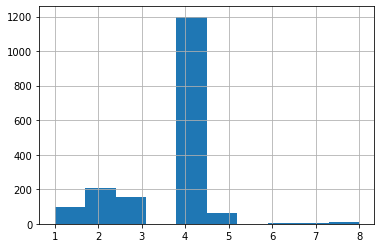

In [688]:
data['Race'].hist()

In [689]:

mean = data['Race'][data['Race']<=5].mean()
mean = ceil(mean)
data['Race'][data['Race']>5]=mean

/Users/irfanjamil/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [690]:
for item in var2type.items():
    if item[1]!='int64':
        #continuous
        print(item[0])

SocioeconomicStatusComposite


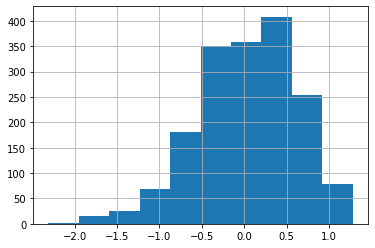

In [691]:
mean = data['SocioeconomicStatusComposite'].loc[data['SocioeconomicStatusComposite']<20].mean()
data['SocioeconomicStatusComposite'].loc[data['SocioeconomicStatusComposite']>=20]=mean
data['SocioeconomicStatusComposite'].hist()

In [721]:
for item in var2type.items():
    if item[1]=='int64':
        #print discrete vars
        print(item[0])

Race
FathersEducation
MothersEducation
FemGaurdianOccupation
MaleGuardianOccupation
AnnualFamilyIncome
Urbanicity
Region
TimeSpentAtHomeAfterSchoolWithoutAdult
AskedIfHomeworkDone
AskedToDoChores
NumTimesDiscussedCourseMaterialWithGuardians
GuardiansAttendedSchoolMeeting
GuardiansSpokenToSchool
LimitOnTvTime
percentMinorityin8thgrade
Theteachingisgood
percentofSchoolwithDiscountedLunch
Prolbemofstudentalcuse
problemofstudentdruguse
LimitOnTimeWithFriends
numtimesyouvedrankalcinlifetime
numcigsyousmokeaday
MathAbilityGroup
ScienceAbilityGroup
EnglishClassAbilityGroup
HistoryAbilityGroup
ReadingStandardizedScore
HistoryStandardizedScore
PastScienceGrades
PastHistoryGrades
Relativereadingproficiencylevel
Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold
AggregateMeasureofControl1
Asthingsstandnowhowfarinschooldoyouthinkyouwillget
Howsureareyouthatyouwillgraduatefromhighschool


In [722]:
discrete2type = {} #dictionary mapping discrete variable to the type of categorical variable it is (ordinal or nominal)
discrete2type['Race']='nominal'
discrete2type['FathersEducation']='ordinal'
discrete2type['MothersEducation']='ordinal'
discrete2type['FemGaurdianOccupation']='nominal'
discrete2type['MaleGuardianOccupation']='nominal'
discrete2type['AnnualFamilyIncome']='ordinal'
discrete2type['Urbanicity']='nominal'
discrete2type['Region']='nominal'
discrete2type['TimeSpentAtHomeAfterSchoolWithoutAdult']='ordinal'
discrete2type['AskedIfHomeworkDone']='ordinal'
discrete2type['AskedToDoChores']='ordinal'
discrete2type['LimitOnTvTime']='ordinal'
discrete2type['NumTimesDiscussedCourseMaterialWithGuardians']='ordinal'
discrete2type['GuardiansAttendedSchoolMeeting']='nominal'
discrete2type['GuardiansSpokenToSchool']='nominal'
discrete2type['percentMinorityin8thgrade']='ordinal'
discrete2type['percentofSchoolwithDiscountedLunch']='ordinal'
discrete2type['Theteachingisgood']='ordinal'
discrete2type['Prolbemofstudentalcuse']='ordinal'
discrete2type['problemofstudentdruguse']='ordinal'
discrete2type['LimitOnTimeWithFriends']='ordinal'
discrete2type['numtimesyouvedrankalcinlifetime']='ordinal'
discrete2type['numcigsyousmokeaday']='ordinal'
discrete2type['MathAbilityGroup']='ordinal'
discrete2type['ScienceAbilityGroup']='ordinal'
discrete2type['EnglishClassAbilityGroup']='ordinal'
discrete2type['HistoryAbilityGroup']='ordinal'
discrete2type['PastScienceGrades']='ordinal'
discrete2type['PastHistoryGrades']='ordinal'
discrete2type['Relativereadingproficiencylevel']='ordinal'
discrete2type['Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold']='nominal'
discrete2type['ReadingStandardizedScore']='ordinal'
discrete2type['HistoryStandardizedScore']='ordinal'
discrete2type['AggregateMeasureofControl1']='ordinal'
discrete2type['Asthingsstandnowhowfarinschooldoyouthinkyouwillget']='ordinal'
discrete2type['Howsureareyouthatyouwillgraduatefromhighschool']='ordinal'

In [723]:
for item in discrete2type.items():
    if item[1]=='ordinal':
        print(item[0])

FathersEducation
MothersEducation
AnnualFamilyIncome
TimeSpentAtHomeAfterSchoolWithoutAdult
AskedIfHomeworkDone
AskedToDoChores
LimitOnTvTime
NumTimesDiscussedCourseMaterialWithGuardians
percentMinorityin8thgrade
percentofSchoolwithDiscountedLunch
Theteachingisgood
Prolbemofstudentalcuse
problemofstudentdruguse
LimitOnTimeWithFriends
numtimesyouvedrankalcinlifetime
numcigsyousmokeaday
MathAbilityGroup
ScienceAbilityGroup
EnglishClassAbilityGroup
HistoryAbilityGroup
PastScienceGrades
PastHistoryGrades
Relativereadingproficiencylevel
ReadingStandardizedScore
HistoryStandardizedScore
AggregateMeasureofControl1
Asthingsstandnowhowfarinschooldoyouthinkyouwillget
Howsureareyouthatyouwillgraduatefromhighschool


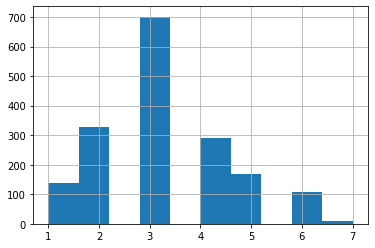

In [725]:
data['AnnualFamilyIncome'].hist()

In [385]:
data['TimeSpentAtHomeAfterSchoolWithoutAdult'].loc[data['TimeSpentAtHomeAfterSchoolWithoutAdult']==8]=0
data['TimeSpentAtHomeAfterSchoolWithoutAdult'].loc[data['TimeSpentAtHomeAfterSchoolWithoutAdult']==6]=0

In [386]:
data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']==6]=0
data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']==8]=-10
data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']==1]=-1
data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']==2]=-2
data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']==3]=-3
data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']==4]=-4
data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']==-4]=1
data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']==-3]=2
data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']==-2]=3
data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']==-1]=4
data['AskedIfHomeworkDone'].loc[data['AskedIfHomeworkDone']==-10]=0


data['AskedToDoChores'].loc[data['AskedToDoChores']==6]=0
data['AskedToDoChores'].loc[data['AskedToDoChores']==8]=-10
data['AskedToDoChores'].loc[data['AskedToDoChores']==1]=-1
data['AskedToDoChores'].loc[data['AskedToDoChores']==2]=-2
data['AskedToDoChores'].loc[data['AskedToDoChores']==3]=-3
data['AskedToDoChores'].loc[data['AskedToDoChores']==4]=-4
data['AskedToDoChores'].loc[data['AskedToDoChores']==-4]=1
data['AskedToDoChores'].loc[data['AskedToDoChores']==-3]=2
data['AskedToDoChores'].loc[data['AskedToDoChores']==-2]=3
data['AskedToDoChores'].loc[data['AskedToDoChores']==-1]=4
data['AskedToDoChores'].loc[data['AskedToDoChores']==-10]=0

data['LimitOnTvTime'].loc[data['LimitOnTvTime']==6]=0
data['LimitOnTvTime'].loc[data['LimitOnTvTime']==8]=-10
data['LimitOnTvTime'].loc[data['LimitOnTvTime']==1]=-1
data['LimitOnTvTime'].loc[data['LimitOnTvTime']==2]=-2
data['LimitOnTvTime'].loc[data['LimitOnTvTime']==3]=-3
data['LimitOnTvTime'].loc[data['LimitOnTvTime']==4]=-4
data['LimitOnTvTime'].loc[data['LimitOnTvTime']==-4]=1
data['LimitOnTvTime'].loc[data['LimitOnTvTime']==-3]=2
data['LimitOnTvTime'].loc[data['LimitOnTvTime']==-2]=3
data['LimitOnTvTime'].loc[data['LimitOnTvTime']==-1]=4
data['LimitOnTvTime'].loc[data['LimitOnTvTime']==-10]=0


data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']==6]=0
data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']==8]=-10
data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']==1]=-1
data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']==2]=-2
data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']==3]=-3
data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']==4]=-4
data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']==-4]=1
data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']==-3]=2
data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']==-2]=3
data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']==-1]=4
data['LimitOnTimeWithFriends'].loc[data['LimitOnTimeWithFriends']==-10]=0


In [387]:
data['NumTimesDiscussedCourseMaterialWithGuardians'].loc[data['NumTimesDiscussedCourseMaterialWithGuardians']==6]=0
data['NumTimesDiscussedCourseMaterialWithGuardians'].loc[data['NumTimesDiscussedCourseMaterialWithGuardians']==8]=0

data['percentMinorityin8thgrade'].loc[data['percentMinorityin8thgrade']==998]=0

data['percentofSchoolwithDiscountedLunch'].loc[data['percentofSchoolwithDiscountedLunch']==998]=0


data['Theteachingisgood'].loc[data['Theteachingisgood']==6]=0
data['Theteachingisgood'].loc[data['Theteachingisgood']==8]=-10
data['Theteachingisgood'].loc[data['Theteachingisgood']==1]=-1
data['Theteachingisgood'].loc[data['Theteachingisgood']==2]=-2
data['Theteachingisgood'].loc[data['Theteachingisgood']==3]=-3
data['Theteachingisgood'].loc[data['Theteachingisgood']==4]=-4
data['Theteachingisgood'].loc[data['Theteachingisgood']==-4]=1
data['Theteachingisgood'].loc[data['Theteachingisgood']==-3]=2
data['Theteachingisgood'].loc[data['Theteachingisgood']==-2]=3
data['Theteachingisgood'].loc[data['Theteachingisgood']==-1]=4
data['Theteachingisgood'].loc[data['Theteachingisgood']==-10]=0

data['Teachersareinterestedinstudents'].loc[data['Teachersareinterestedinstudents']==6]=0
data['Teachersareinterestedinstudents'].loc[data['Teachersareinterestedinstudents']==8]=-10
data['Teachersareinterestedinstudents'].loc[data['Teachersareinterestedinstudents']==1]=-1
data['Teachersareinterestedinstudents'].loc[data['Teachersareinterestedinstudents']==2]=-2
data['Teachersareinterestedinstudents'].loc[data['Teachersareinterestedinstudents']==3]=-3
data['Teachersareinterestedinstudents'].loc[data['Teachersareinterestedinstudents']==4]=-4
data['Teachersareinterestedinstudents'].loc[data['Teachersareinterestedinstudents']==-4]=1
data['Teachersareinterestedinstudents'].loc[data['Teachersareinterestedinstudents']==-3]=2
data['Teachersareinterestedinstudents'].loc[data['Teachersareinterestedinstudents']==-2]=3
data['Teachersareinterestedinstudents'].loc[data['Teachersareinterestedinstudents']==-1]=4
data['Teachersareinterestedinstudents'].loc[data['Teachersareinterestedinstudents']==-10]=0

data['WhenIworkhardonschoolworkmyteacherspraisemyeffort'].loc[data['WhenIworkhardonschoolworkmyteacherspraisemyeffort']==6]=0
data['WhenIworkhardonschoolworkmyteacherspraisemyeffort'].loc[data['WhenIworkhardonschoolworkmyteacherspraisemyeffort']==8]=-10
data['WhenIworkhardonschoolworkmyteacherspraisemyeffort'].loc[data['WhenIworkhardonschoolworkmyteacherspraisemyeffort']==1]=-1
data['WhenIworkhardonschoolworkmyteacherspraisemyeffort'].loc[data['WhenIworkhardonschoolworkmyteacherspraisemyeffort']==2]=-2
data['WhenIworkhardonschoolworkmyteacherspraisemyeffort'].loc[data['WhenIworkhardonschoolworkmyteacherspraisemyeffort']==3]=-3
data['WhenIworkhardonschoolworkmyteacherspraisemyeffort'].loc[data['WhenIworkhardonschoolworkmyteacherspraisemyeffort']==4]=-4
data['WhenIworkhardonschoolworkmyteacherspraisemyeffort'].loc[data['WhenIworkhardonschoolworkmyteacherspraisemyeffort']==-4]=1
data['WhenIworkhardonschoolworkmyteacherspraisemyeffort'].loc[data['WhenIworkhardonschoolworkmyteacherspraisemyeffort']==-3]=2
data['WhenIworkhardonschoolworkmyteacherspraisemyeffort'].loc[data['WhenIworkhardonschoolworkmyteacherspraisemyeffort']==-2]=3
data['WhenIworkhardonschoolworkmyteacherspraisemyeffort'].loc[data['WhenIworkhardonschoolworkmyteacherspraisemyeffort']==-1]=4
data['WhenIworkhardonschoolworkmyteacherspraisemyeffort'].loc[data['WhenIworkhardonschoolworkmyteacherspraisemyeffort']==-10]=0

data['InclassIoftenfeelputdownbymyteachers'].loc[data['InclassIoftenfeelputdownbymyteachers']==6]=0
data['InclassIoftenfeelputdownbymyteachers'].loc[data['InclassIoftenfeelputdownbymyteachers']==8]=-10
data['InclassIoftenfeelputdownbymyteachers'].loc[data['InclassIoftenfeelputdownbymyteachers']==1]=-1
data['InclassIoftenfeelputdownbymyteachers'].loc[data['InclassIoftenfeelputdownbymyteachers']==2]=-2
data['InclassIoftenfeelputdownbymyteachers'].loc[data['InclassIoftenfeelputdownbymyteachers']==3]=-3
data['InclassIoftenfeelputdownbymyteachers'].loc[data['InclassIoftenfeelputdownbymyteachers']==4]=-4
data['InclassIoftenfeelputdownbymyteachers'].loc[data['InclassIoftenfeelputdownbymyteachers']==-4]=1
data['InclassIoftenfeelputdownbymyteachers'].loc[data['InclassIoftenfeelputdownbymyteachers']==-3]=2
data['InclassIoftenfeelputdownbymyteachers'].loc[data['InclassIoftenfeelputdownbymyteachers']==-2]=3
data['InclassIoftenfeelputdownbymyteachers'].loc[data['InclassIoftenfeelputdownbymyteachers']==-1]=4
data['InclassIoftenfeelputdownbymyteachers'].loc[data['InclassIoftenfeelputdownbymyteachers']==-10]=0

data['MostofmyteachersreallylistentowhatIhavetosay'].loc[data['MostofmyteachersreallylistentowhatIhavetosay']==6]=0
data['MostofmyteachersreallylistentowhatIhavetosay'].loc[data['MostofmyteachersreallylistentowhatIhavetosay']==8]=-10
data['MostofmyteachersreallylistentowhatIhavetosay'].loc[data['MostofmyteachersreallylistentowhatIhavetosay']==1]=-1
data['MostofmyteachersreallylistentowhatIhavetosay'].loc[data['MostofmyteachersreallylistentowhatIhavetosay']==2]=-2
data['MostofmyteachersreallylistentowhatIhavetosay'].loc[data['MostofmyteachersreallylistentowhatIhavetosay']==3]=-3
data['MostofmyteachersreallylistentowhatIhavetosay'].loc[data['MostofmyteachersreallylistentowhatIhavetosay']==4]=-4
data['MostofmyteachersreallylistentowhatIhavetosay'].loc[data['MostofmyteachersreallylistentowhatIhavetosay']==-4]=1
data['MostofmyteachersreallylistentowhatIhavetosay'].loc[data['MostofmyteachersreallylistentowhatIhavetosay']==-3]=2
data['MostofmyteachersreallylistentowhatIhavetosay'].loc[data['MostofmyteachersreallylistentowhatIhavetosay']==-2]=3
data['MostofmyteachersreallylistentowhatIhavetosay'].loc[data['MostofmyteachersreallylistentowhatIhavetosay']==-1]=4
data['MostofmyteachersreallylistentowhatIhavetosay'].loc[data['MostofmyteachersreallylistentowhatIhavetosay']==-10]=0

data['Prolbemofstudentalcuse'].loc[data['Prolbemofstudentalcuse']==6]=0
data['Prolbemofstudentalcuse'].loc[data['Prolbemofstudentalcuse']==8]=0

data['problemofstudentdruguse'].loc[data['problemofstudentdruguse']==6]=0
data['problemofstudentdruguse'].loc[data['problemofstudentdruguse']==8]=0

data['numcigsyousmokeaday'].loc[data['numcigsyousmokeaday']==5]=6
data['numcigsyousmokeaday'].loc[data['numcigsyousmokeaday']==4]=5
data['numcigsyousmokeaday'].loc[data['numcigsyousmokeaday']==3]=4
data['numcigsyousmokeaday'].loc[data['numcigsyousmokeaday']==2]=3
data['numcigsyousmokeaday'].loc[data['numcigsyousmokeaday']==1]=2
data['numcigsyousmokeaday'].loc[data['numcigsyousmokeaday']==0]=1
data['numcigsyousmokeaday'].loc[data['numcigsyousmokeaday']==96]=0
data['numcigsyousmokeaday'].loc[data['numcigsyousmokeaday']==98]=0

data['numtimesyouvedrankalcinlifetime'].loc[data['numtimesyouvedrankalcinlifetime']==8]=0
data['numtimesyouvedrankalcinlifetime'].loc[data['numtimesyouvedrankalcinlifetime']==6]=0


data['MathAbilityGroup'].loc[data['MathAbilityGroup']==1]=-1
data['MathAbilityGroup'].loc[data['MathAbilityGroup']==2]=-2
data['MathAbilityGroup'].loc[data['MathAbilityGroup']==3]=-3
data['MathAbilityGroup'].loc[data['MathAbilityGroup']==4]=0
data['MathAbilityGroup'].loc[data['MathAbilityGroup']==5]=-10
data['MathAbilityGroup'].loc[data['MathAbilityGroup']==6]=-10
data['MathAbilityGroup'].loc[data['MathAbilityGroup']==8]=-11
data['MathAbilityGroup'].loc[data['MathAbilityGroup']==-1]=3
data['MathAbilityGroup'].loc[data['MathAbilityGroup']==-2]=2
data['MathAbilityGroup'].loc[data['MathAbilityGroup']==-3]=1
data['MathAbilityGroup'].loc[data['MathAbilityGroup']==-10]=0
data['MathAbilityGroup'].loc[data['MathAbilityGroup']==-11]=0

data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']==1]=-1
data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']==2]=-2
data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']==3]=-3
data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']==4]=0
data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']==5]=-10
data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']==6]=-10
data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']==8]=-11
data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']==-1]=3
data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']==-2]=2
data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']==-3]=1
data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']==-10]=0
data['ScienceAbilityGroup'].loc[data['ScienceAbilityGroup']==-11]=0

data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']==1]=-1
data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']==2]=-2
data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']==3]=-3
data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']==4]=0
data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']==5]=-10
data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']==6]=-10
data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']==8]=-11
data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']==-1]=3
data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']==-2]=2
data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']==-3]=1
data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']==-10]=0
data['EnglishClassAbilityGroup'].loc[data['EnglishClassAbilityGroup']==-11]=0

data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']==1]=-1
data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']==2]=-2
data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']==3]=-3
data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']==4]=0
data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']==5]=-10
data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']==6]=-10
data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']==8]=-11
data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']==-1]=3
data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']==-2]=2
data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']==-3]=1
data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']==-10]=0
data['HistoryAbilityGroup'].loc[data['HistoryAbilityGroup']==-11]=0

data['mathgradesinhs'].loc[data['mathgradesinhs']==96]=10
data['mathgradesinhs'].loc[data['mathgradesinhs']==97]=10
data['mathgradesinhs'].loc[data['mathgradesinhs']==98]=10

data['sciencegradesinhs'].loc[data['sciencegradesinhs']==96]=10
data['sciencegradesinhs'].loc[data['sciencegradesinhs']==97]=10
data['sciencegradesinhs'].loc[data['sciencegradesinhs']==98]=10

data['englishgradesinhs'].loc[data['englishgradesinhs']==96]=10
data['englishgradesinhs'].loc[data['englishgradesinhs']==97]=10
data['englishgradesinhs'].loc[data['englishgradesinhs']==98]=10

data['historygradesinhs'].loc[data['historygradesinhs']==96]=10
data['historygradesinhs'].loc[data['historygradesinhs']==97]=10
data['historygradesinhs'].loc[data['historygradesinhs']==98]=10

data['AggregateMeasureofControl1'].loc[data['AggregateMeasureofControl1']==998]=0

data['AggregateMeasureofControl2'].loc[data['AggregateMeasureofControl2']==98]=0

data['AggregateMeasureofSelfEsteem1'].loc[data['AggregateMeasureofSelfEsteem1']==98]=0

data['OverallAcademicPerformanceComposite'].loc[data['OverallAcademicPerformanceComposite']==98]=0

data['Asthingsstandnowhowfarinschooldoyouthinkyouwillget'].loc[data['Asthingsstandnowhowfarinschooldoyouthinkyouwillget']==96]=0
data['Asthingsstandnowhowfarinschooldoyouthinkyouwillget'].loc[data['Asthingsstandnowhowfarinschooldoyouthinkyouwillget']==97]=0
data['Asthingsstandnowhowfarinschooldoyouthinkyouwillget'].loc[data['Asthingsstandnowhowfarinschooldoyouthinkyouwillget']==98]=0

data['Howsureareyouthatyouwillgraduatefromhighschool'].loc[data['Howsureareyouthatyouwillgraduatefromhighschool']==6]=0
data['Howsureareyouthatyouwillgraduatefromhighschool'].loc[data['Howsureareyouthatyouwillgraduatefromhighschool']==8]=0


In [391]:
tier5.remove('ParentsMaritalStatus')



In [692]:
analysisVars = tier1+tier2+tier3+tier4+tier5+tier6+tier7+tier8
data=data[analysisVars]

In [393]:
for item in var2type.items():
    if item[1]=='int64':
        var2type[item[0]]="category"
data=data.astype(var2type)
data.head()

,Race,FathersEducation,MothersEducation,ParentsHighestEducationLevelfromStuandParqxs,FemGaurdianOccupation,MaleGuardianOccupation,LanguageSpokeninHome,AnnualFamilyIncome,SocioeconomicStatusComposite,Urbanicity,...,sciencegradesinhs,ReadingStandardizedScore,MathStandardizedScore,ScienceStandardizedScore,HistoryStandardizedScore,OverallAcademicPerformanceComposite,AggregateMeasureofSelfEsteem1,AggregateMeasureofSelfEsteem2,Asthingsstandnowhowfarinschooldoyouthinkyouwillget,Howsureareyouthatyouwillgraduatefromhighschool
id,,,,,,,,,,,,,,,,,,,,,
124966,4,1,2,0.71,2,2,1,3,0.89,1,...,2.0,0.0,2.0,0.0,3.0,5,74,0.81,1,4
124968,4,2,2,0.72,1,8,99,3,0.92,1,...,2.0,3.0,2.0,0.0,2.0,4,74,1.24,1,4
124972,4,3,3,-0.02,1,12,99,3,-0.16,1,...,2.0,4.0,2.0,0.0,2.0,4,74,-0.04,2,3
124999,4,2,2,1.10,1,5,99,3,0.23,1,...,2.0,4.0,2.0,0.0,3.0,2,73,0.38,2,4
175551,3,2,3,0.32,1,6,99,3,0.02,1,...,2.0,3.0,2.0,0.0,0.0,6,73,-0.04,2,2


In [394]:
#no missing data, data columns are named appropriately, discrete2type dict maps discrete vars to either ordinal or nominal
#var2type dict maps vars to either discrete or continuous, within the df, the discrete vars are dtype categories, ordinal variables' values have been adjusted
# so that the bs entries are grouped to be 0 (ie: lower, bad value), now we should 

id
124966     0.0
124968     3.0
124972     4.0
124999     4.0
175551     3.0
          ... 
9196922    3.0
9196931    3.0
9196944    5.0
9199107    5.0
9199195    4.0
Name: ReadingStandardizedScore, Length: 1814, dtype: category
Categories (6, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [693]:
levelsDict = {} #maps discrete variable to list of the unique values it takes
for item in var2type.items():
    if item[1]=='int64':
        unique_vals = list(np.sort(data[item[0]].unique().astype(int)))
        levelsDict[item[0]]=unique_vals[:]
levelsDict

{'Race': [1, 2, 3, 4, 5],
 'FathersEducation': [1, 2, 3, 4, 5, 6, 7],
 'MothersEducation': [1, 2, 3, 4, 5, 6, 7],
 'FemGaurdianOccupation': [1, 2, 3, 4, 7, 8, 9],
 'MaleGuardianOccupation': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16],
 'AnnualFamilyIncome': [1, 2, 3, 4, 5, 6, 7],
 'Urbanicity': [1, 2, 3],
 'Region': [1, 2, 3],
 'TimeSpentAtHomeAfterSchoolWithoutAdult': [1, 2],
 'AskedIfHomeworkDone': [1, 2, 3, 4],
 'AskedToDoChores': [1, 2, 3, 4],
 'NumTimesDiscussedCourseMaterialWithGuardians': [1, 2, 3],
 'GuardiansAttendedSchoolMeeting': [0, 1, 2],
 'GuardiansSpokenToSchool': [0, 1, 2],
 'LimitOnTvTime': [1, 2, 3, 4],
 'percentMinorityin8thgrade': [1, 2, 3, 4, 5, 6, 7],
 'Theteachingisgood': [1, 2, 3, 4],
 'percentofSchoolwithDiscountedLunch': [1, 2, 3],
 'Prolbemofstudentalcuse': [1, 2, 3, 4],
 'problemofstudentdruguse': [1, 2, 3, 4],
 'LimitOnTimeWithFriends': [1, 2, 3, 4],
 'numtimesyouvedrankalcinlifetime': [1, 2, 3, 4, 5],
 'numcigsyous

In [694]:
levelsNames = {} # maps discrete variable to each of its levels' indicator column names
for item in levelsDict.items():
    var = item[0]
    vals = item[1]
    temp = []
    for i in range(len(vals)):
        val=vals[i]
        temp.append(var+str(val))
    levelsNames[var]=temp[:]
levelsNames

{'Race': ['Race1', 'Race2', 'Race3', 'Race4', 'Race5'],
 'FathersEducation': ['FathersEducation1',
  'FathersEducation2',
  'FathersEducation3',
  'FathersEducation4',
  'FathersEducation5',
  'FathersEducation6',
  'FathersEducation7'],
 'MothersEducation': ['MothersEducation1',
  'MothersEducation2',
  'MothersEducation3',
  'MothersEducation4',
  'MothersEducation5',
  'MothersEducation6',
  'MothersEducation7'],
 'FemGaurdianOccupation': ['FemGaurdianOccupation1',
  'FemGaurdianOccupation2',
  'FemGaurdianOccupation3',
  'FemGaurdianOccupation4',
  'FemGaurdianOccupation7',
  'FemGaurdianOccupation8',
  'FemGaurdianOccupation9'],
 'MaleGuardianOccupation': ['MaleGuardianOccupation1',
  'MaleGuardianOccupation2',
  'MaleGuardianOccupation3',
  'MaleGuardianOccupation4',
  'MaleGuardianOccupation5',
  'MaleGuardianOccupation6',
  'MaleGuardianOccupation7',
  'MaleGuardianOccupation8',
  'MaleGuardianOccupation9',
  'MaleGuardianOccupation10',
  'MaleGuardianOccupation11',
  'MaleGuar

In [695]:
length = data.shape[0]
for item in levelsNames.items():
    for i in range(len(item[1])):
        if i != len(item[1])-1: #the last category for each discrete variable is the reference value 
            data[item[1][i]]=pd.Series(np.zeros(length),index=data.index)


In [696]:
levelsReferenceDict = {}
for item in levelsDict.items():
    var = item[0]
    levelsReferenceDict[var]=item[1][len(item[1])-1]
levelsReferenceDict

{'Race': 5,
 'FathersEducation': 7,
 'MothersEducation': 7,
 'FemGaurdianOccupation': 9,
 'MaleGuardianOccupation': 16,
 'AnnualFamilyIncome': 7,
 'Urbanicity': 3,
 'Region': 3,
 'TimeSpentAtHomeAfterSchoolWithoutAdult': 2,
 'AskedIfHomeworkDone': 4,
 'AskedToDoChores': 4,
 'NumTimesDiscussedCourseMaterialWithGuardians': 3,
 'GuardiansAttendedSchoolMeeting': 2,
 'GuardiansSpokenToSchool': 2,
 'LimitOnTvTime': 4,
 'percentMinorityin8thgrade': 7,
 'Theteachingisgood': 4,
 'percentofSchoolwithDiscountedLunch': 3,
 'Prolbemofstudentalcuse': 4,
 'problemofstudentdruguse': 4,
 'LimitOnTimeWithFriends': 4,
 'numtimesyouvedrankalcinlifetime': 5,
 'numcigsyousmokeaday': 5,
 'MathAbilityGroup': 4,
 'ScienceAbilityGroup': 4,
 'EnglishClassAbilityGroup': 4,
 'HistoryAbilityGroup': 4,
 'ReadingStandardizedScore': 5,
 'HistoryStandardizedScore': 3,
 'PastScienceGrades': 5,
 'PastHistoryGrades': 6,
 'Relativereadingproficiencylevel': 8,
 'Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold': 8,
 '

In [697]:
cols = list(levelsNames.keys())
for i in range(data.shape[0]):
    for col in cols:
        if var2type[col]=='int64':
            #discrete variable
            val = data[col].iloc[i]
            if levelsReferenceDict[col]!=val:
                data[col+str(int(val))].iloc[i]=1
data

,Race,FathersEducation,MothersEducation,FemGaurdianOccupation,MaleGuardianOccupation,AnnualFamilyIncome,SocioeconomicStatusComposite,Urbanicity,Region,TimeSpentAtHomeAfterSchoolWithoutAdult,...,AggregateMeasureofControl15,AggregateMeasureofControl16,Asthingsstandnowhowfarinschooldoyouthinkyouwillget1,Asthingsstandnowhowfarinschooldoyouthinkyouwillget2,Asthingsstandnowhowfarinschooldoyouthinkyouwillget3,Asthingsstandnowhowfarinschooldoyouthinkyouwillget4,Asthingsstandnowhowfarinschooldoyouthinkyouwillget6,Howsureareyouthatyouwillgraduatefromhighschool1,Howsureareyouthatyouwillgraduatefromhighschool2,Howsureareyouthatyouwillgraduatefromhighschool3
id,,,,,,,,,,,,,,,,,,,,,
124966,4,1,2,2,2,3,0.89,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124968,4,2,2,1,8,3,0.92,1,1,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124972,4,3,3,1,12,3,-0.16,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
124999,4,2,2,1,5,3,0.23,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
175551,3,2,3,1,6,3,0.02,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196922,4,6,6,1,9,4,-2.31,1,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9196931,4,5,5,1,6,4,-0.22,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9196944,4,4,2,1,13,3,0.44,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [730]:
from statsmodels.miscmodels.ordinal_model import OrderedModel #import this for Logit Ordinal regression
import statsmodels.formula.api as smf

In [731]:
def markov_blanket_selection(data, target_variable, candidates, varTypeDict,discrete2catDict,levelsNames,ordinal_mn, alpha=1):
    """
    Find the Markov blanket of a variable from a set of candidates.
    Since we have simplified the problem to where we assume a known
    "tier-wise" topological ordering of the variables, the Markov
    blanket of a variable is simply its boundary. That is,
    mb(Vi) = pa(Vi) \cup nb(Vi).
    
    Asymptotically, the forward-backward selection process implemented
    below will discover the true Markov blanket of Vi when data comes
    from a curved exponential family (due to its reliance on the BIC score.)
    
    :param data: a Pandas data frame.
    :param target_variable: string corresponding to name of the variable whose Markov blanket we want.
    :param candidates: iterable of names of candidate variables that will form the Markov blanket.
    :param varTypeDict: dictionary mapping variable names to dtype
    :param discrete2catDict: maps discrete var names to whether it's ordinal or nominal
    :alpha: positive real number controlling the penalty applied to #params in the BIC score
    """

    # initialize the Markov blanket to be the empty set
    markov_blanket = set()
    candidates = set(candidates)
    n = len(data)
    poisson = ordinal_mn!=True #determine what type of distribution we are fitting to discrete variables 
    
    # get an initial BIC score for the graph where the Markov blanket is empty
    # you can adapt the fitting of these models for continuous/discrete variables as needed
    # maybe set up a dictionary mapping from variables to their state space and decide the appropriate model to fit
    # currently we will assume all variables are binary
    # model = sm.GLM.from_formula(target_variable + '~ 1', data=data, family=sm.families.Gaussian()).fit()
    
    
    #choosing Gaussian GLM family for variables that are continuous 
    #choosing some dist from GLM family for variables that are discrete 
    #both are in the curved exponential family 
    
    if varTypeDict[target_variable]=='int64':
        #discrete variable, fit with Poisson distribution when dealing with no regressors
        model = sm.GLM.from_formula(target_variable + '~ 1', data=data, family=sm.families.Poisson()).fit()
    else:
        #continuous var so choose Gaussian family
        model = sm.GLM.from_formula(target_variable + '~ 1', data=data, family=sm.families.Gaussian()).fit()
    
    best_bic = -2*model.llf + len(model.params)*np.log(n)
    score_change = True
    
    # forward phase
    # greedily minimize the BIC score by adding variables to the Markov blanket
    # that result in the best improvement
    while score_change:
        
        score_change = False
        best_cand_bic = np.inf
        best_cand = ""

        # go through each possible candidate
        for cand_var in candidates:
            
            # fit a model for the target variable where the candidate is 
            # added to its current Markov blanket
            if varTypeDict[cand_var]=='int64':
                levs = levelsNames[cand_var]
                formula = target_variable + '~ 1 +' + '+'.join(levs[:-1])
            else:
                formula = target_variable + '~ 1 +' + cand_var
            if len(markov_blanket) > 0:
                for variable in markov_blanket:
                    if varTypeDict[variable]=='int64':
                        levs = levelsNames[variable]
                        formula = formula + '+' + '+'.join(levs[:-1])
                    else:
                        formula = formula + '+' + variable
            
            if varTypeDict[target_variable]=='int64':
                #discrete var
                if not poisson:
                    if (discrete2catDict[target_variable]=='ordinal'):
                        #ordinal variable
                        if (len(markov_blanket)==0):
                            if varTypeDict[cand_var]!='int64':
                                #continuous
                                model = OrderedModel(data[target_variable],data[cand_var],distr='logit').fit()
                            else:
                                levs = levelsNames[cand_var]
                                levs = levs[:-1]
                                model = OrderedModel(data[target_variable],data[levs],distr='logit').fit()
                        else:
                            mb = list(markov_blanket)+[cand_var]
                            cands = []
                            for variable in mb:
                                if varTypeDict[variable]!='int64':
                                    cands.append(variable)
                                else:
                                    levs = levelsNames[variable]
                                    cands+=levs[:-1]
                            model = OrderedModel(data[target_variable],data[cands],distr='logit').fit()
                    else:
                        #nominal variable 
                        model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
                        #if (len(markov_blanket)==0):
                         #   model = sm.MNLogit(data[target_variable], data[cand_var]).fit_regularized()
                        #else:
                         #   mb = list(markov_blanket)+[cand_var]
                          #  model = sm.MNLogit(data[target_variable], data[mb].to_numpy()).fit_regularized()
                else:
                    #fitting Poisson regression
                    model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
            else:
                #continuous var so choose Gaussian family
                model = sm.GLM.from_formula(formula, data=data, family=sm.families.Gaussian()).fit()
            
            # compare the BIC score to the best candidate found so far
            cand_bic = -2*model.llf + len(model.params)*alpha*np.log(n)
            if cand_bic < best_cand_bic:
                best_cand = cand_var
                best_cand_bic = cand_bic
        
        # see if the best candidate addition improves on the current optimal Markov blanket
        if best_cand_bic < best_bic:
            markov_blanket.add(best_cand)
            candidates.remove(best_cand)
            best_bic = best_cand_bic
            score_change = True
     
    # backward phase
    # greedily minimize the BIC score by removing variables from the Markov blanket
    # that result in the best improvement
    score_change = True
    while score_change:
        
        score_change = False
        best_cand_bic = np.inf
        best_cand = ""

        # go through each possible candidate variable to be deleted
        for cand_var in markov_blanket:
            
            # fit a model for the target variable where the candidate is 
            # deleted to its current Markov blanket
            formula = target_variable + '~ 1'
            if len(markov_blanket) - 1 > 0: # if theres more than 1 variable in the MB
                temp_set = markov_blanket-set([cand_var])
                for variable in temp_set:
                    if varTypeDict[variable]=='int64':
                        levs = levelsNames[variable]
                        formula = formula + '+' + '+'.join(levs[:-1])
                    else:
                        formula = formula + '+' + variable
            #formula has all of the MB except for the cand var
            if varTypeDict[target_variable]=='int64':
                #discrete var
                if len(markov_blanket)==1:
                    model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
                else:
                    if poisson:
                        model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
                    else:
                        if (discrete2catDict[target_variable]=='ordinal'):
                            #ordinal
                            mb = list(markov_blanket-set([cand_var]))
                            cands = []
                            for variable in mb:
                                if varTypeDict[variable]!='int64':
                                    cands.append(variable)
                                else:
                                    levs = levelsNames[variable]
                                    cands+=levs[:-1]
                            model = OrderedModel(data[target_variable],data[cands],distr='logit').fit()
                        else:
                            #nominal
                            model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
                            #mb = list(markov_blanket-set([cand_var]))
                            #model = sm.MNLogit(data[target_variable],data[mb].to_numpy()).fit_regularized()
            else:
                #continuous var so choose Gaussian family
                model = sm.GLM.from_formula(formula, data=data, family=sm.families.Gaussian()).fit()
            
            # compare the BIC score to the best candidate found so far
            cand_bic = -2*model.llf + len(model.params)*alpha*np.log(n)
            if cand_bic < best_cand_bic:
                best_cand = cand_var
                best_cand_bic = cand_bic
        
        # see if the best candidate deletion improves on the current optimal Markov blanket
        if best_cand_bic < best_bic:
            markov_blanket.remove(best_cand)
            best_bic = best_cand_bic
            score_change = True
        
    return markov_blanket

def cg_structure_learning(data,originalcols, tier_ordering,varTypeDict,discrete2catDict,levelsNames,ordinal_mn, forbid_within_tier=None, alpha=1):
    """
    A hybrid algorithm based on theory in 
    1) Javidian et al. 2019 https://arxiv.org/pdf/2006.00970.pdf
    2) Bhattacharya et al. 2018 https://arxiv.org/pdf/1907.00221.pdf
    
    The idea is to provide a rough topological ordering on the variables from background knowledge
    and group them into "tiers" -- remember form lecture that this feature is also often used in Tetrad
    when learning ancestral ADMGs. We restrict edges between tiers as follows:
    
    a) Variables in earlier tiers can potentially cause those in later tiers, but not vice versa. 
    b) Dynamic feedback/contagion via undirected edges may occur only between variables within the same tier.
    
    Good candidates for variables in earlier tiers include variables such
    as Age, Sex, Race etc. that should not be caused by other variables. Variables
    in later tiers include terminal outcomes such as Survival, Recovered etc.
    
    If the tier ordering provided is correct,  and the data comes from a curved exponential family
    (as we rely on the BIC score) that is faithful with respect to some true chain graph, asymptotically 
    speaking, the algorithm below will recover the true chain graph exactly.
    Note under our restrictions the recovery is exact, i.e., there is no ambiguity of Markov equivalence.
    
    :param data: pandas DataFrame
    :tier_ordering: list of lists. the first list consists of all variables in tier 1, the second all variables in
                    tier 2, and so on.
    :varTypeDict: map whose key,value pairs are variable name and its data type
    :discrete2catDict: map whose key,value paris are discrete var names and whether its ordinal or nominal 
    :forbid_within_tier: list of booleans. works similar to the Tetrad option. sometimes it is also useful to
                         restrict how the undirected edges can occur within a tier. E.g., if the tier contains
                         Age and Sex -- these two variables should not be in a dynamic feedback relationship.
    :alpha: positive real number controlling the penalty applied to #params in the BIC score
    """
    
    if forbid_within_tier is None:
        forbid_within_tier = [False]*len(tier_ordering)
        
    # start with an empty chain graph
    estimated_cg = CG(vertices=originalcols)

    # go over each tier. let V represent the set of variables
    # in the current tier and U represent the set of variables
    # in all previous tiers. then at each step we are looking
    # to learn edges of the form Vi--Vj and Ui-->Vi. that is,
    # at each step we are looking for (and only allow) undirected
    # edges between variables within a tier, and directed edges
    # from variables in previous tiers to the current tier.
    for i, curr_tier in enumerate(tier_ordering):
        
        # maintain a mapping of variables to their Markov blankets
        markov_blankets = {v: set() for v in curr_tier}
        
        # determine candidates for the Markov blanket from pervious tiers
        cands_prev_tiers = set(itertools.chain.from_iterable(tier_ordering[:i]))
        # go over each variable Vi in the current tier
        for Vi in curr_tier:
            if not forbid_within_tier[i]:
                cands_curr_tier = set(curr_tier) - set([Vi])
            markov_blankets[Vi] = markov_blanket_selection(data, Vi, cands_prev_tiers | cands_curr_tier,varTypeDict,discrete2catDict,levelsNames, ordinal_mn, alpha)
            
            # add edges Mi -> Vi or Mi -- Vi
            # from the learned Markov blanket
            for Mi in markov_blankets[Vi]:
                
                # if Mi is in a previous tier, it must be a directed edge
                if Mi in cands_prev_tiers:
                    estimated_cg.add_diedge(Mi, Vi)
                # otherwise Mi is in the current tier, but we will add the undirected 
                # edge only if the Vi is also in the Markov blanket of Mi.
                # that is, we have Mi -- Vj only if Mi is in mb(Vi) AND Vi is in mb(Mi)
                # this rule can be changed/tuned to for example use OR instead of AND
                # which will result in denser graphs
                elif Vi in markov_blankets[Mi]:
                    estimated_cg.add_udedge(Mi, Vi)
    
    return estimated_cg

In [786]:
#causal discovery
logit = False
G = cg_structure_learning(data,cols+['SocioeconomicStatusComposite'],tiers,var2type,discrete2type,levelsNames,logit)
graph=G.draw()
if logit:
    graph.render('cgLogit.gv',view=True)
else:
    graph.render('cgPoisson.gv',view=True)


In [787]:
G.di_edges

{('AskedToDoChores', 'PastScienceGrades'),
 ('FathersEducation', 'AggregateMeasureofControl1'),
 ('FathersEducation', 'AnnualFamilyIncome'),
 ('FathersEducation', 'MaleGuardianOccupation'),
 ('FathersEducation', 'SocioeconomicStatusComposite'),
 ('MathAbilityGroup', 'AggregateMeasureofControl1'),
 ('MothersEducation', 'AnnualFamilyIncome'),
 ('NumTimesDiscussedCourseMaterialWithGuardians',
  'Relativereadingproficiencylevel'),
 ('Prolbemofstudentalcuse', 'AggregateMeasureofControl1'),
 ('Race', 'AggregateMeasureofControl1'),
 ('Race', 'HistoryStandardizedScore'),
 ('SocioeconomicStatusComposite',
  'Asthingsstandnowhowfarinschooldoyouthinkyouwillget'),
 ('SocioeconomicStatusComposite', 'EnglishClassAbilityGroup'),
 ('SocioeconomicStatusComposite', 'HistoryAbilityGroup'),
 ('SocioeconomicStatusComposite',
  'Howsureareyouthatyouwillgraduatefromhighschool'),
 ('SocioeconomicStatusComposite', 'MathAbilityGroup'),
 ('SocioeconomicStatusComposite',
  'NumTimesDiscussedCourseMaterialWithGuar

In [788]:
G.delete_diedge('Race','AggregateMeasureofControl1')
G.delete_diedge('Race','HistoryStandardizedScore')

In [789]:
G.draw().render('cgPoisson.gv',view=True)

'cgPoisson.gv.pdf'

In [72]:
len(data.columns)

52

In [740]:
len(G.di_edges)

23

In [735]:
len(G.ud_edges)

9

In [743]:
#89 directed edges and 30 undirected edges in original CG learned
di_edge_dict = {}
for de in G.di_edges:
    di_edge_dict[de]=0
ud_edge_dict = {}
for ue in G.ud_edges:
    ud_edge_dict[ue]=0
#initializing 2 dictionaries to count num of times each edge in original CG learned appears in the bootstrap CGs learned
#so the domain for the values are [0,numBootstraps]

In [744]:
for i in range(26):
    #bootstrap causal discovery 26 times
    sample = data.sample(frac=1,replace=True,axis=0)
    ananke_cg = cg_structure_learning(sample,cols+['SocioeconomicStatusComposite'],tiers,var2type,discrete2type,levelsNames,False)
    bootstrap_de = ananke_cg.di_edges #directed edges in the cur bootstrap graph
    bootstrap_ue = ananke_cg.ud_edges #ud edges in the cur bootstrap graph 
    for de in G.di_edges:
        #loop over original CG's directed edge set and check if that edge is in the current bootstrap cg
        if de in bootstrap_de:
            di_edge_dict[de]=di_edge_dict[de]+1
    for ue in G.ud_edges:
        #loop over CG's undirected edge set and do same as above for loop
        if ue in bootstrap_ue:
            ud_edge_dict[ue]=ud_edge_dict[ue]+1
    print(i+1) #print progress because the causal discovery process will take a long time 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [796]:
directed_edges = []
for de in list(di_edge_dict.keys()):
    if di_edge_dict[de]>=17:
        directed_edges.append(de)
directed_edges = set(directed_edges)
directed_edges

{('FathersEducation', 'AggregateMeasureofControl1'),
 ('FathersEducation', 'AnnualFamilyIncome'),
 ('FathersEducation', 'MaleGuardianOccupation'),
 ('FathersEducation', 'SocioeconomicStatusComposite'),
 ('MathAbilityGroup', 'AggregateMeasureofControl1'),
 ('MothersEducation', 'AnnualFamilyIncome'),
 ('NumTimesDiscussedCourseMaterialWithGuardians',
  'Relativereadingproficiencylevel'),
 ('Prolbemofstudentalcuse', 'AggregateMeasureofControl1'),
 ('Race', 'AggregateMeasureofControl1'),
 ('Race', 'HistoryStandardizedScore'),
 ('SocioeconomicStatusComposite',
  'Asthingsstandnowhowfarinschooldoyouthinkyouwillget'),
 ('SocioeconomicStatusComposite', 'EnglishClassAbilityGroup'),
 ('SocioeconomicStatusComposite', 'HistoryAbilityGroup'),
 ('SocioeconomicStatusComposite',
  'Howsureareyouthatyouwillgraduatefromhighschool'),
 ('SocioeconomicStatusComposite', 'MathAbilityGroup'),
 ('SocioeconomicStatusComposite', 'PastHistoryGrades'),
 ('SocioeconomicStatusComposite', 'PastScienceGrades'),
 ('Soci

In [745]:
di_edge_dict

{('SocioeconomicStatusComposite',
  'NumTimesDiscussedCourseMaterialWithGuardians'): 16,
 ('SocioeconomicStatusComposite',
  'Asthingsstandnowhowfarinschooldoyouthinkyouwillget'): 26,
 ('MathAbilityGroup', 'AggregateMeasureofControl1'): 17,
 ('SocioeconomicStatusComposite',
  'Howsureareyouthatyouwillgraduatefromhighschool'): 26,
 ('Race', 'HistoryStandardizedScore'): 21,
 ('numcigsyousmokeaday', 'ReadingStandardizedScore'): 25,
 ('SocioeconomicStatusComposite',
  'TimeSpentAtHomeAfterSchoolWithoutAdult'): 21,
 ('SocioeconomicStatusComposite', 'PastHistoryGrades'): 21,
 ('SocioeconomicStatusComposite',
  'Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold'): 26,
 ('AskedToDoChores', 'PastScienceGrades'): 11,
 ('MothersEducation', 'AnnualFamilyIncome'): 26,
 ('NumTimesDiscussedCourseMaterialWithGuardians',
  'Relativereadingproficiencylevel'): 22,
 ('FathersEducation', 'SocioeconomicStatusComposite'): 18,
 ('FathersEducation', 'AggregateMeasureofControl1'): 24,
 ('SocioeconomicStatu

In [746]:
ud_edge_dict

{('Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold',
  'Asthingsstandnowhowfarinschooldoyouthinkyouwillget'): 20,
 ('ScienceAbilityGroup', 'EnglishClassAbilityGroup'): 25,
 ('Prolbemofstudentalcuse', 'problemofstudentdruguse'): 26,
 ('FathersEducation', 'MothersEducation'): 26,
 ('LimitOnTvTime', 'LimitOnTimeWithFriends'): 25,
 ('GuardiansAttendedSchoolMeeting', 'GuardiansSpokenToSchool'): 25,
 ('AskedIfHomeworkDone', 'LimitOnTvTime'): 26,
 ('numtimesyouvedrankalcinlifetime', 'numcigsyousmokeaday'): 26,
 ('PastScienceGrades', 'Relativereadingproficiencylevel'): 13}

In [797]:
undirected_edges = []
for ue in list(ud_edge_dict.keys()):
    if ud_edge_dict[ue]>=17:
        undirected_edges.append(ue)
undirected_edges = set(undirected_edges)
undirected_edges

{('AskedIfHomeworkDone', 'LimitOnTvTime'),
 ('FathersEducation', 'MothersEducation'),
 ('GuardiansAttendedSchoolMeeting', 'GuardiansSpokenToSchool'),
 ('LimitOnTvTime', 'LimitOnTimeWithFriends'),
 ('Prolbemofstudentalcuse', 'problemofstudentdruguse'),
 ('ScienceAbilityGroup', 'EnglishClassAbilityGroup'),
 ('Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold',
  'Asthingsstandnowhowfarinschooldoyouthinkyouwillget'),
 ('numtimesyouvedrankalcinlifetime', 'numcigsyousmokeaday')}

In [800]:
bs = CG(vertices=list(G.vertices),di_edges=directed_edges,ud_edges=undirected_edges)


{('AskedToDoChores', 'PastScienceGrades'),
 ('SocioeconomicStatusComposite',
  'NumTimesDiscussedCourseMaterialWithGuardians')}

In [747]:
for item in di_edge_dict.items():
    edge = item[0]
    count= item[1]
    if count < 17:
        G.delete_diedge(edge[0],edge[1])
for item in ud_edge_dict.items():
    edge = item[0]
    count = item[1]
    if count < 17:
        G.delete_udedge(edge[0],edge[1])


In [782]:
G.delete_diedge('Race','AggregateMeasureofControl1')

In [781]:
G.ud_edges

{('AskedIfHomeworkDone', 'LimitOnTvTime'),
 ('FathersEducation', 'MothersEducation'),
 ('GuardiansAttendedSchoolMeeting', 'GuardiansSpokenToSchool'),
 ('LimitOnTvTime', 'LimitOnTimeWithFriends'),
 ('Prolbemofstudentalcuse', 'problemofstudentdruguse'),
 ('ScienceAbilityGroup', 'EnglishClassAbilityGroup'),
 ('Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold',
  'Asthingsstandnowhowfarinschooldoyouthinkyouwillget'),
 ('numtimesyouvedrankalcinlifetime', 'numcigsyousmokeaday')}

In [783]:
bootstrapGraph=G.draw()
bootstrapGraph.render('cgBS.gv',view=True)

'cgBS.gv.pdf'

In [784]:
G.di_edges

{('FathersEducation', 'AggregateMeasureofControl1'),
 ('FathersEducation', 'AnnualFamilyIncome'),
 ('FathersEducation', 'MaleGuardianOccupation'),
 ('FathersEducation', 'SocioeconomicStatusComposite'),
 ('MathAbilityGroup', 'AggregateMeasureofControl1'),
 ('MothersEducation', 'AnnualFamilyIncome'),
 ('NumTimesDiscussedCourseMaterialWithGuardians',
  'Relativereadingproficiencylevel'),
 ('Prolbemofstudentalcuse', 'AggregateMeasureofControl1'),
 ('SocioeconomicStatusComposite',
  'Asthingsstandnowhowfarinschooldoyouthinkyouwillget'),
 ('SocioeconomicStatusComposite', 'EnglishClassAbilityGroup'),
 ('SocioeconomicStatusComposite', 'HistoryAbilityGroup'),
 ('SocioeconomicStatusComposite',
  'Howsureareyouthatyouwillgraduatefromhighschool'),
 ('SocioeconomicStatusComposite', 'MathAbilityGroup'),
 ('SocioeconomicStatusComposite', 'PastHistoryGrades'),
 ('SocioeconomicStatusComposite', 'PastScienceGrades'),
 ('SocioeconomicStatusComposite', 'TimeSpentAtHomeAfterSchoolWithoutAdult'),
 ('Socioec

In [785]:
G.ud_edges

{('AskedIfHomeworkDone', 'LimitOnTvTime'),
 ('FathersEducation', 'MothersEducation'),
 ('GuardiansAttendedSchoolMeeting', 'GuardiansSpokenToSchool'),
 ('LimitOnTvTime', 'LimitOnTimeWithFriends'),
 ('Prolbemofstudentalcuse', 'problemofstudentdruguse'),
 ('ScienceAbilityGroup', 'EnglishClassAbilityGroup'),
 ('Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold',
  'Asthingsstandnowhowfarinschooldoyouthinkyouwillget'),
 ('numtimesyouvedrankalcinlifetime', 'numcigsyousmokeaday')}

In [760]:
G.parents(['AggregateMeasureofControl1'])

{'FathersEducation',
 'MathAbilityGroup',
 'Prolbemofstudentalcuse',
 'Race',
 'percentofSchoolwithDiscountedLunch'}

In [761]:
var2type['AggregateMeasureofControl1']

'int64'

In [763]:
parents = G.parents(['AggregateMeasureofControl1'])
formula = 'AggregateMeasureofControl1' + '~ 1'
for par in parents:
    if var2type[par]=='int64':
        formula+= '+' + '+'.join(levelsNames[par][:-1])
    else:
        formula+= '+' + par
model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
model.params

Intercept                              0.520774
percentofSchoolwithDiscountedLunch1   -0.262268
percentofSchoolwithDiscountedLunch2   -0.395982
Race1                                 -0.016803
Race2                                  0.262669
Race3                                  0.256260
Race4                                 -0.104043
FathersEducation1                      0.825134
FathersEducation2                      0.659364
FathersEducation3                      0.631117
FathersEducation4                      0.449411
FathersEducation5                      0.309667
FathersEducation6                      0.103399
MathAbilityGroup1                      0.324006
MathAbilityGroup2                      0.204413
MathAbilityGroup3                      0.118448
Prolbemofstudentalcuse1                0.161322
Prolbemofstudentalcuse2                0.191011
Prolbemofstudentalcuse3                0.126927
dtype: float64

In [766]:
G.parents(['SocioeconomicStatusComposite'])

{'FathersEducation'}

In [767]:
var2type['FathersEducation']

'int64'

In [768]:
var2type['SocioeconomicStatusComposite']

'float64'

In [770]:
formula = 'SocioeconomicStatusComposite ~ 1 + ' + '+'.join(levelsNames['FathersEducation'][:-1])
model = sm.GLM.from_formula(formula, data=data, family=sm.families.Gaussian()).fit()
model.params

Intercept            0.265377
FathersEducation1   -0.367179
FathersEducation2   -0.279072
FathersEducation3   -0.324707
FathersEducation4   -0.172306
FathersEducation5   -0.109155
FathersEducation6   -0.034289
dtype: float64

In [774]:
parents = G.parents(['AnnualFamilyIncome'])
formula = 'AnnualFamilyIncome ~ 1'
for par in parents:
    if var2type[par]=='int64':
        formula += '+' + '+'.join(levelsNames[par][:-1])
    else:
        formula +=par
model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
model.params

Intercept            1.727036
MothersEducation1   -0.514611
MothersEducation2   -0.269250
MothersEducation3   -0.157061
MothersEducation4   -0.170440
MothersEducation5   -0.027391
MothersEducation6    0.035491
FathersEducation1   -0.633424
FathersEducation2   -0.506837
FathersEducation3   -0.450807
FathersEducation4   -0.354180
FathersEducation5   -0.249446
FathersEducation6   -0.144480
dtype: float64

In [802]:
bs.parents(['MathAbilityGroup'])

{'SocioeconomicStatusComposite'}

In [803]:
var2type['MathAbilityGroup']

'int64'

In [804]:
formula = 'MathAbilityGroup ~ 1 + SocioeconomicStatusComposite'
model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
model.params

Intercept                       1.178825
SocioeconomicStatusComposite    0.117541
dtype: float64

In [807]:
bs.parents(['HistoryAbilityGroup'])

{'SocioeconomicStatusComposite'}

In [806]:
formula = 'HistoryAbilityGroup ~ 1 + SocioeconomicStatusComposite'
model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
model.params

Intercept                       0.700035
SocioeconomicStatusComposite   -0.102143
dtype: float64

In [805]:
data['SocioeconomicStatusComposite'].describe()

count    1742.000000
mean        0.037596
std         0.588166
min        -2.310000
25%        -0.350000
50%         0.030000
75%         0.440000
max         1.280000
Name: SocioeconomicStatusComposite, dtype: float64

In [810]:
bs.parents(['PastScienceGrades'])

{'SocioeconomicStatusComposite'}

In [811]:
var2type['PastScienceGrades']

'int64'

In [812]:
formula = 'PastScienceGrades ~ 1 + SocioeconomicStatusComposite'
model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
model.params

Intercept                       0.558568
SocioeconomicStatusComposite    0.202421
dtype: float64

In [813]:
bs.parents(['SocioeconomicStatusComposite'])

{'FathersEducation'}

In [814]:
var2type['FathersEducation']

'int64'

In [816]:
formula = 'SocioeconomicStatusComposite ~ 1 +' + '+'.join(levelsNames['FathersEducation'][:-1])
model = sm.GLM.from_formula(formula, data=data, family=sm.families.Gaussian()).fit()
model.params

Intercept            0.265377
FathersEducation1   -0.367179
FathersEducation2   -0.279072
FathersEducation3   -0.324707
FathersEducation4   -0.172306
FathersEducation5   -0.109155
FathersEducation6   -0.034289
dtype: float64

In [772]:
var2type['AnnualFamilyIncome']

'int64'

In [775]:
var2type['Howsureareyouthatyouwillgraduatefromhighschool']

'int64'

In [776]:
G.parents(['Howsureareyouthatyouwillgraduatefromhighschool'])

{'SocioeconomicStatusComposite'}

In [777]:
formula = 'Howsureareyouthatyouwillgraduatefromhighschool ~ 1' + ' + SocioeconomicStatusComposite'
model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
model.params

Intercept                       1.185439
SocioeconomicStatusComposite    0.175621
dtype: float64

In [66]:
Bootstrap_MB_dict = {}
vertices = list(G.vertices)
for v in vertices:
    parents = G.parents([v])
    neighbors = G.neighbors([v])
    mb = list(parents)+list(neighbors)
    Bootstrap_MB_dict[v]=mb
Bootstrap_MB_dict

{'Race': [],
 'FathersEducation': ['MothersEducation'],
 'MothersEducation': ['FathersEducation'],
 'ParentsHighestEducationLevelfromStuandParqxs': [],
 'FemGaurdianOccupation': ['FathersEducation', 'MaleGuardianOccupation'],
 'MaleGuardianOccupation': ['FathersEducation', 'FemGaurdianOccupation'],
 'LanguageSpokeninHome': ['MothersEducation',
  'Race',
  'ParentsHighestEducationLevelfromStuandParqxs'],
 'AnnualFamilyIncome': ['MothersEducation', 'FathersEducation'],
 'SocioeconomicStatusComposite': ['ParentsHighestEducationLevelfromStuandParqxs'],
 'ParentsMaritalStatus': ['MothersEducation',
  'FemGaurdianOccupation',
  'AnnualFamilyIncome',
  'LanguageSpokeninHome',
  'FathersEducation'],
 'Urbanicity': ['Region'],
 'Region': ['Urbanicity'],
 'StudyPlaceinHome': ['GuardiansSpokenToSchool'],
 'TimeSpentAtHomeAfterSchoolWithoutAdult': ['SocioeconomicStatusComposite'],
 'AskedIfHomeworkDone': ['LimitOnTvTime'],
 'AskedToDoChores': ['ParentsHighestEducationLevelfromStuandParqxs',
  'Lim

In [67]:
#Bootstrap_MB_dict is a dictionary mapping each vertex in the bootstrap graph to its markov blanket
Bootstrap_regressionParams_dict = {}
temp = []
for item in Bootstrap_MB_dict.items():
    temp.clear()
    var = item[0]
    mb = item[1]
    formula = var + '~ 1'
    if len(mb) > 0:
        formula = formula + '+' + '+'.join(mb)
    if (var2type[var]=='int64'):
        #discrete
        #fit Poisson regression
        model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
        temp.append(model.params['Intercept']) #0th param is intercept
        for x in mb:
            temp.append(model.params[x])
        Bootstrap_regressionParams_dict[var]=temp[:] #(i+1)th param corresponds to coeff of ith var in markov blanket
    else:
        #continuous
        #fit Gaussian distribution
        model = sm.GLM.from_formula(formula, data=data, family=sm.families.Gaussian()).fit()
        temp.append(model.params['Intercept']) #0th param is intercept
        for x in mb:
            temp.append(model.params[x])
        Bootstrap_regressionParams_dict[var]=temp[:] #(i+1)th param corresponds to coeff of ith var in markov blanket
Bootstrap_regressionParams_dict 

{'Race': [1.2704045157093589],
 'FathersEducation': [0.3670747250766559, 0.2240552361930046],
 'MothersEducation': [0.3822119000474323, 0.18949903010023683],
 'ParentsHighestEducationLevelfromStuandParqxs': [0.638313138368247],
 'FemGaurdianOccupation': [0.22049639549171696,
  -0.05184316142709213,
  0.020106363723514303],
 'MaleGuardianOccupation': [1.6804217911319026,
  0.03246351378844162,
  0.296027661730519],
 'LanguageSpokeninHome': [3.371566204225825,
  0.008142437123889068,
  0.265225382214965,
  -0.006136838737071772],
 'AnnualFamilyIncome': [0.7117499027723164,
  0.060859479319649246,
  0.0836903657948585],
 'SocioeconomicStatusComposite': [0.0573295790707476, 0.9950981490002806],
 'ParentsMaritalStatus': [-1.6642941269410096,
  0.06741759378947301,
  -0.024687416194667862,
  0.3715068999130161,
  0.0015685782399985355,
  0.06296763527189225],
 'Urbanicity': [-0.07225651315378172, 0.26067612478039803],
 'Region': [-0.23778542537089273, 0.27888542280491635],
 'StudyPlaceinHome

In [68]:
#blocks form a DAG
#create adjacency matrix of the blocks
import numpy as np
blocks = G.blocks
adj_mat = np.zeros((len(G.blocks),len(G.blocks)))
for i in range(len(blocks)):
    block = blocks[i]
    children = list(G.children(block))
    adjacent = []
    for c in children:
        adj_block = G.block(c)
        if adj_block not in adjacent:
            adjacent.append(adj_block)
            idx = blocks.index(adj_block)
            adj_mat[i][idx]=1
adj_mat

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [69]:
in_degrees = []
for i in range(len(blocks)):
    in_degrees.append(int((adj_mat[:,i]).sum()))
in_degrees

[0,
 0,
 0,
 1,
 3,
 1,
 1,
 4,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 3,
 2,
 1,
 9,
 0,
 0,
 3,
 2,
 3]

In [70]:
queue = []
ordering = []
visited = list(np.zeros(len(blocks)))
for i in range(len(blocks)):
    if in_degrees[i]==0:
        queue.append(i)
        visited[i]=1
while len(queue)>0:
    cur = queue[0]
    ordering.append(cur)
    queue=queue[1:]
    for i in range(len(blocks)):
        if adj_mat[cur][i]==1 and visited[i]==0:
            in_degrees[i]-=1
            if in_degrees[i]==0:
                queue.append(i)
                visited[i]=1
ordering
        

[0,
 1,
 2,
 8,
 16,
 20,
 25,
 26,
 13,
 3,
 5,
 4,
 6,
 11,
 12,
 18,
 28,
 7,
 10,
 14,
 15,
 23,
 19,
 9,
 17,
 22,
 21,
 27,
 24,
 29]

In [71]:
for i in range(len(ordering)):
    num = ordering[i]
    ordering[i]=blocks[num]
ordering

[{'Race'},
 {'FathersEducation', 'MothersEducation'},
 {'ParentsHighestEducationLevelfromStuandParqxs'},
 {'Region', 'Urbanicity'},
 {'WhenIworkhardonschoolworkmyteacherspraisemyeffort'},
 {'numcigsyousmokeaday', 'numtimesyouvedrankalcinlifetime'},
 {'AggregateMeasureofControl2'},
 {'englishgradesinhs',
  'historygradesinhs',
  'mathgradesinhs',
  'sciencegradesinhs'},
 {'percentMinorityin8thgrade'},
 {'FemGaurdianOccupation', 'MaleGuardianOccupation'},
 {'AnnualFamilyIncome'},
 {'LanguageSpokeninHome'},
 {'SocioeconomicStatusComposite'},
 {'AskedIfHomeworkDone', 'AskedToDoChores', 'LimitOnTvTime'},
 {'NumTimesDiscussedCourseMaterialWithGuardians'},
 {'Prolbemofstudentalcuse', 'problemofstudentdruguse'},
 {'AggregateMeasureofSelfEsteem1'},
 {'ParentsMaritalStatus'},
 {'TimeSpentAtHomeAfterSchoolWithoutAdult'},
 {'Theteachingisgood'},
 {'InclassIoftenfeelputdownbymyteachers',
  'MostofmyteachersreallylistentowhatIhavetosay',
  'Teachersareinterestedinstudents'},
 {'Whatkindofworkdoyouex

In [116]:
def sampleFromCG(numSamples):
    samples = np.zeros((len(data.columns),numSamples))
    vertexOrdering = []
    for block in ordering:
        for vertex in block:
            vertexOrdering.append(vertex)
    for s in range(numSamples):
        old_vals = np.ones(len(data.columns))*5
        cur_vals = np.zeros(len(data.columns))
        for i in range(1000):
            cur_vals = np.zeros(len(data.columns))
            seen = []
            for block in ordering:
                for vertex in block:
                    mb = Bootstrap_MB_dict[vertex]
                    sum_ = Bootstrap_regressionParams_dict[vertex][0] #intercept 
                    idx = -1
                    for exog in mb:
                        idx+=1
                        if exog in seen:
                            sum_+=(Bootstrap_regressionParams_dict[vertex][idx+1]*cur_vals[vertexOrdering.index(exog)])
                        else:
                            sum_+=(Bootstrap_regressionParams_dict[vertex][idx+1]*old_vals[vertexOrdering.index(exog)])
                    seen.append(vertex)
                    mu=sum_
                    if mu<0:
                        mu = 0.001
                    if var2type[vertex]=='int64':
                        cur_vals[vertexOrdering.index(vertex)]=np.random.poisson(mu)
                    else:
                        cur_vals[vertexOrdering.index(vertex)]=np.random.normal(loc=mu)
            old_vals = cur_vals
        cur_vals = old_vals #completed burn in period
        actual_sample = np.zeros(len(data.columns))
        seen = []
        for block in ordering:
            for vertex in block:
                mb = Bootstrap_MB_dict[vertex]
                sum_ = Bootstrap_regressionParams_dict[vertex][0] #intercept 
                idx = -1
                for exog in mb:
                    idx+=1
                    if exog in seen:
                        sum_+=(Bootstrap_regressionParams_dict[vertex][idx+1]*cur_vals[vertexOrdering.index(exog)])
                    else:
                        sum_+=(Bootstrap_regressionParams_dict[vertex][idx+1]*old_vals[vertexOrdering.index(exog)])
                seen.append(vertex)
                mu=sum_
                if (mu<0):
                    mu = 0.001
                if var2type[vertex]=='int64':
                        actual_sample[vertexOrdering.index(vertex)]=np.random.poisson(mu)
                else:
                        actual_sample[vertexOrdering.index(vertex)]=np.random.normal(loc=mu)
        samples[:,s]=np.copy(actual_sample)
    return samples
    

In [118]:
x=sampleFromCG(1)
x

array([[ 1.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.22513444],
       [ 0.        ],
       [ 0.        ],
       [ 4.        ],
       [ 1.89427602],
       [ 3.91995533],
       [ 1.        ],
       [ 2.8057178 ],
       [ 0.92114069],
       [ 1.69046071],
       [ 1.39831997],
       [ 2.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.        ],
       [ 4.        ],
       [ 1.4474536 ],
       [ 0.        ],
       [ 2.        ],
       [ 0.        ],
       [ 1.        ],
       [ 0.        ],
       [ 0.        ],
       [ 5.        ],
       [ 0.49080985],
       [ 0.        ],
       [ 2.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 2.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 4.        ],
       [ 1.27547314],
       [ 2

In [119]:
x = x.reshape(-1)

In [120]:
x

array([ 1.        ,  0.        ,  0.        , -0.22513444,  0.        ,
        0.        ,  4.        ,  1.89427602,  3.91995533,  1.        ,
        2.8057178 ,  0.92114069,  1.69046071,  1.39831997,  2.        ,
        0.        ,  0.        ,  1.        ,  4.        ,  1.4474536 ,
        0.        ,  2.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  5.        ,  0.49080985,  0.        ,  2.        ,
        0.        ,  0.        ,  0.        ,  2.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  4.        ,  1.27547314,
        2.2688869 ,  0.        ,  2.61415126, -0.90746203,  1.        ,
       -1.84523626,  1.        ])

In [123]:
samples = sampleFromCG(10)

In [124]:
samples = samples.reshape(52,10)
np.mean(samples,axis=1)

array([ 1.3       ,  0.6       ,  0.5       ,  0.02764407,  0.        ,
        0.        ,  0.5       ,  4.76147581,  4.61879192,  1.5       ,
        2.70269233,  2.38060322,  2.76898907,  2.49427425,  2.3       ,
        1.3       ,  0.2       ,  1.1       ,  4.4       ,  1.23882738,
        1.5       ,  0.8       ,  0.2       ,  0.9       ,  0.4       ,
        0.6       ,  4.1       ,  0.06778824,  0.2       ,  0.7       ,
        0.1       ,  0.4       ,  0.6       ,  1.5       ,  0.4       ,
        0.3       ,  0.        ,  0.2       ,  0.8       ,  1.1       ,
        0.        ,  0.        ,  0.        ,  1.6       ,  1.79359901,
        4.98511472,  1.1       ,  2.80884793, 16.37343055,  1.3       ,
        1.13156607,  0.6       ])

In [126]:
samples[:,2]

array([ 3.        ,  0.        ,  2.        ,  0.39034713,  0.        ,
        0.        ,  0.        ,  4.7405611 ,  4.5165157 ,  1.        ,
        0.78045811,  0.66535816,  1.86004667,  2.73829608,  5.        ,
        3.        ,  0.        ,  1.        ,  3.        ,  0.10510729,
        2.        ,  0.        ,  0.        ,  3.        ,  0.        ,
        0.        ,  7.        ,  1.12055227,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  1.07328408,
        5.09034919,  1.        ,  4.22668766, 24.79215146,  0.        ,
        0.78091994,  0.        ])

In [127]:
samples[:,3]

array([ 2.        ,  1.        ,  1.        ,  1.22894563,  0.        ,
        0.        ,  0.        ,  5.57805242,  7.07263896,  3.        ,
        4.74447405,  4.28745273,  4.71408095,  2.41521794,  2.        ,
        2.        ,  0.        ,  0.        ,  3.        ,  3.63188832,
        2.        ,  3.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  2.        ,  1.15386196,  0.        ,  0.        ,
        0.        ,  0.        ,  3.        ,  2.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  2.02856231,
        7.05911933,  3.        ,  3.43948093, 19.73077911,  1.        ,
        3.9160059 ,  0.        ])

In [134]:
vertexOrdering = []
for block in ordering:
    for v in block:
        vertexOrdering.append(v)
vertexOrdering

['Race',
 'MothersEducation',
 'FathersEducation',
 'ParentsHighestEducationLevelfromStuandParqxs',
 'Urbanicity',
 'Region',
 'WhenIworkhardonschoolworkmyteacherspraisemyeffort',
 'numcigsyousmokeaday',
 'numtimesyouvedrankalcinlifetime',
 'AggregateMeasureofControl2',
 'historygradesinhs',
 'mathgradesinhs',
 'englishgradesinhs',
 'sciencegradesinhs',
 'percentMinorityin8thgrade',
 'MaleGuardianOccupation',
 'FemGaurdianOccupation',
 'AnnualFamilyIncome',
 'LanguageSpokeninHome',
 'SocioeconomicStatusComposite',
 'AskedToDoChores',
 'AskedIfHomeworkDone',
 'LimitOnTvTime',
 'NumTimesDiscussedCourseMaterialWithGuardians',
 'Prolbemofstudentalcuse',
 'problemofstudentdruguse',
 'AggregateMeasureofSelfEsteem1',
 'ParentsMaritalStatus',
 'TimeSpentAtHomeAfterSchoolWithoutAdult',
 'Theteachingisgood',
 'MostofmyteachersreallylistentowhatIhavetosay',
 'Teachersareinterestedinstudents',
 'InclassIoftenfeelputdownbymyteachers',
 'Whatkindofworkdoyouexpecttobedoingwhenyouare30yearsold',
 'Lim

In [135]:
vertexOrdering.index('OverallAcademicPerformanceComposite')

43

In [136]:
Bootstrap_MB_dict['OverallAcademicPerformanceComposite']

['ParentsMaritalStatus',
 'HistoryAbilityGroup',
 'ParentsHighestEducationLevelfromStuandParqxs']

In [137]:
Bootstrap_regressionParams_dict['OverallAcademicPerformanceComposite']

[1.4579299879376975,
 0.13159247444867664,
 0.04473220414897951,
 -0.027590547132702495]

In [138]:
data['OverallAcademicPerformanceComposite'].describe()

count    1814.000000
mean        4.665932
std         1.294384
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         6.000000
Name: OverallAcademicPerformanceComposite, dtype: float64